# Data Analyst Final Portfolio Project: Marketing Analytics

In this project I will use Exploratory Data Analysis (EDA) to discover the trends, patterns and get insights about the marketing data.I will do this through the use of summary statistics and data visualizations

## Import Python Modules

First I import the modules that will be used in this project:

In [1]:
#here I import all necessary libraries for project
import datetime

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Loading the Dataset

I downloaded the data from Kaggle:

[marketing-data](https://www.kaggle.com/jackdaoud/marketing-data)


Now we load the csv into a DataFrame and inspect the data:

In [2]:
df = pd.read_csv("marketing_data.csv")

df.head()

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [18]:
df.shape

(2240, 28)

Our dataset has 2240 rows and 28 columns. The following is the list of our dataset columns:

- `ID` = Customer's unique identifier
- `Year_Birth`= Customer's birth year
- `Education` = Customer's level of education
- `Marital_Status` = Customer's marital status
- `Income` = Customer's yearly household income
- `Kidhome` = Number of small children in customer's household
- `Teenhome` = Number of teenagers in customer's household
- `Dt_Customer` = Date of customer's enrollment with the company
- `Recency` = Number of days since the last purchase
- `MntWines` = Amount spent on wine in the last 2 years
- `MntFruits` = Amount spent on fruits in the last 2 years
- `MntMeatProducts` = Amount spent on meat in the last 2 years
- `MntFishProducts` = Amount spent on fish in the last 2 years
- `MntSweetProducts`= Amount spent on sweets in the last 2 years
- `MntGoldProds` = Amount spent on gold in the last 2 years
- `NumDealsPurchases` = Number of purchases made with a discount
- `NumWebPurchases` = Number of purchases made through the company's web site
- `NumCatalogPurchases` = Number of purchases made using a catalogue
- `NumStorePurchases` = Number of purchases made directly in stores
- `NumWebVisitsMonth` = Number of visits to company's web site in the last month
- `AcceptedCmp1` =1 if customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2` =1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3` =1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4` =1 if customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5` =1 if customer accepted the offer in the 5th campaign, 0 otherwise
- `Response` = 1 if customer accepted the offer in the last campaign, 0 otherwise
- `Complain` = 1 if customer complained in the last 2 years, 0 otherwise
- `Country` = Customer's location

### Data Cleaning

I have to :

- Drop rows with null values
- Drop the duplicated rows.
- Clean the Income column and change its data type into float
- Check whether all columns are in the desired data type.Otherwise I have to convert their datatype

In [3]:
print(df.isna().sum())

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


We can see that income column has 24 null values. Now I remove rows with null values:

In [3]:
df_clean = df.dropna()

Now by calling info function we can see that there is no null value in all of our columns.

In [69]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
id                     2216 non-null int64
YearBirth              2216 non-null int64
Education              2216 non-null object
MaritalStatus          2216 non-null object
Income                 2216 non-null object
Kidhome                2216 non-null int64
Teenhome               2216 non-null int64
DtCustomer             2216 non-null object
Recency                2216 non-null int64
MntWines               2216 non-null int64
MntFruits              2216 non-null int64
MntMeatProducts        2216 non-null int64
MntFishProducts        2216 non-null int64
MntSweetProducts       2216 non-null int64
MntGoldProducts        2216 non-null int64
NumDealsPurchases      2216 non-null int64
NumWebPurchases        2216 non-null int64
NumCatalogPurchases    2216 non-null int64
NumStorePurchases      2216 non-null int64
NumWebVisitsMonth      2216 non-null int64
AcceptedCmp3           2216 n

In [16]:
df_clean.duplicated().sum()

0

We can see that the data does not have any duplicated rows.

Now lets remove `id` column which has no useful information.

In [4]:
df_clean.drop(columns=['id'],  inplace = True)

Lets take a look at the frequency of unique values in some of the columns.

In [20]:
df_clean.Education.value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [19]:
df_clean.MaritalStatus.value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: MaritalStatus, dtype: int64

In [75]:
df_clean.Country.value_counts()

Country
SP     1092
SA      335
CA      266
AUS     147
IND     146
GER     116
US      107
ME        3
Name: count, dtype: int64

In [7]:
df_clean.Complain.value_counts()

Complain
0    2195
1      21
Name: count, dtype: int64

In [42]:
df_clean.DtCustomer.value_counts()

8/31/12    12
5/12/14    11
2/14/13    11
9/12/12    11
8/20/13    10
           ..
8/4/13      1
3/27/14     1
4/10/14     1
11/1/13     1
1/24/13     1
Name: DtCustomer, Length: 662, dtype: int64

We have to convert `Dt_Customer` column to datetime format:

In [5]:
# convert Date of customer's enrollment with the company into Python Date time object
df_clean["DtCustomer"]= pd.to_datetime(df_clean["DtCustomer"])
df_clean.DtCustomer.value_counts()

DtCustomer
2012-08-31    12
2013-02-14    11
2014-05-12    11
2012-09-12    11
2013-08-20    10
              ..
2014-01-09     1
2012-09-05     1
2013-11-09     1
2013-07-20     1
2012-09-01     1
Name: count, Length: 662, dtype: int64

Now I remove dollar sign and "," from the `Income` column and convert it to float type:

In [6]:
df_clean['Income'] = df_clean['Income'].str.replace('$', "")
df_clean['Income'] = df_clean['Income'].str.replace(',', "").astype(float)

In [7]:
df_clean.Income.value_counts()

Income
7500.0     12
35860.0     4
46098.0     3
39922.0     3
67445.0     3
           ..
46086.0     1
42243.0     1
35788.0     1
36026.0     1
94871.0     1
Name: count, Length: 1974, dtype: int64

### Creating New Columns

- Age of the customer can be calculated from `Year_Birth` column.

In [8]:
currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
currentYear = date.year

print(f"Current Year -> {currentYear}")

df_clean['Age']= currentYear - df_clean['YearBirth']


df_clean['Age'].head()

Current Year -> 2023


0    53
1    62
2    65
3    56
4    34
Name: Age, dtype: int64

- Number of all dependent children in customer's household can be calculated by  summing the `Kidhome` and `Teenhome` columns.

In [9]:
df_clean['ChildrenHome'] = df_clean['Kidhome'] + df_clean['Teenhome']

df_clean['ChildrenHome'].head()

0    0
1    0
2    1
3    2
4    1
Name: ChildrenHome, dtype: int64

- Number of Years of being a Customer can be calculated using `DtCustomer` column.

In [10]:
#Number of Years of being a Customer
df_clean["NumYearCustomer"] = currentYear - df_clean["DtCustomer"].apply(lambda x: x.year)

df_clean["NumYearCustomer"]

0        9
1        9
2        9
3        9
4        9
        ..
2235    10
2236    10
2237    11
2238    11
2239    11
Name: NumYearCustomer, Length: 2216, dtype: int64

- We can find the total spending of each customer by summing the amounts of 6 products(Wines, Fruits, MeatProducts, FishProducts, SweetProducts, GoldProducts)

In [11]:
df_clean['TotalSpending']= df_clean['MntWines']+df_clean['MntFruits'] + df_clean['MntMeatProducts'] \
                          +df_clean['MntFishProducts']+df_clean['MntSweetProducts']+df_clean['MntGoldProducts']

df_clean['TotalSpending'].head()

0    1190
1     577
2     251
3      11
4      91
Name: TotalSpending, dtype: int64

- The total number of purchases ('TotalNumPurchases') can be calculated by adding the values of all columns containing the keyword 'Purchases'

In [12]:
df_clean['TotalNumPurchases'] = df_clean['NumDealsPurchases'] + df_clean['NumWebPurchases'] +\
                             df_clean['NumCatalogPurchases'] + df_clean['NumStorePurchases']

df_clean['TotalNumPurchases'].head()

0    15
1    18
2    11
3     4
4     8
Name: TotalNumPurchases, dtype: int64

- The total number of campains accepted ('TotalAcceptedCmp') can be calculated by adding the values of all columns containing the keywords 'Cmp' and 'Response' (the latest campaign)

In [13]:
df_clean['TotalAcceptedCmp'] = df_clean['AcceptedCmp1'] + df_clean['AcceptedCmp2'] + df_clean['AcceptedCmp3'] \
                             + df_clean['AcceptedCmp4'] + df_clean['AcceptedCmp5'] + df_clean['Response']

df_clean['TotalAcceptedCmp'].head()

0    1
1    2
2    0
3    0
4    2
Name: TotalAcceptedCmp, dtype: int64

### Removing Outliers

By plotting the boxplot of each numerical column we can find the outliers.Lets plot the boxplot for `Income`.

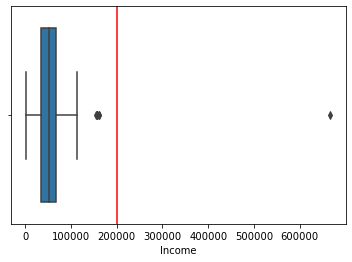

In [33]:
sns.boxplot(df_clean["Income"])

plt.axvline(x=200000, color ='red')

plt.show()

There is one extreme outlier on the right side of the graph at 666666.We can filter out cusomers with income more than 200000.

In [14]:
df_clean = df_clean[df_clean['Income']<200000]

len(df_clean)

2215

The boxplot of age column is plotted in the graph below.We can see that there are three customers who are more than one hundred years old.These are outliers and should be removed.

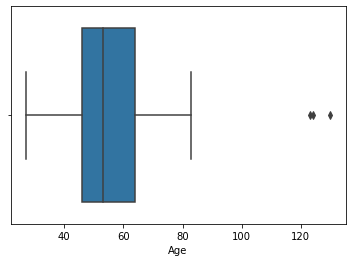

In [17]:
sns.boxplot(df_clean["Age"])

plt.show()

In [15]:
df_clean = df_clean[df_clean['Age']<100]

len(df_clean)

2212

## Explore and Explain Data

Now I take a look at some columns and build graphs from the data to get better understanding about our dataset.

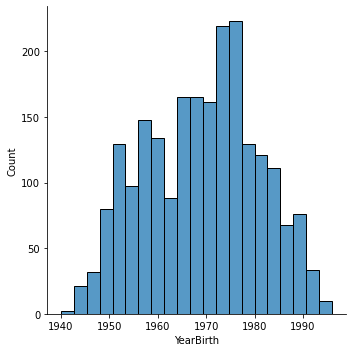

In [16]:
sns.displot(x=df_clean['YearBirth'])  
plt.show()

Most of the customers were born between 70's and 80's.

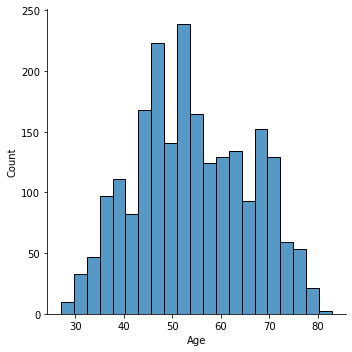

In [34]:
sns.displot(x=df_clean['Age'])  
plt.show()

Most of the customers are middle aged.Most of them are in the age group of 50-54.

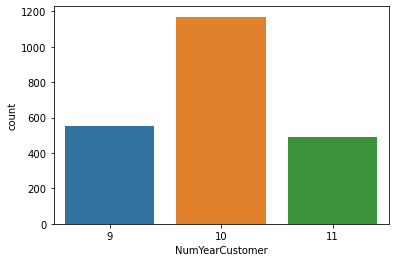

In [19]:
sns.countplot(x=df_clean['NumYearCustomer'])  
plt.show()

Most of the users have been a customer for 10 years.The other half of the users have been a customer for either 9 or 11 years.

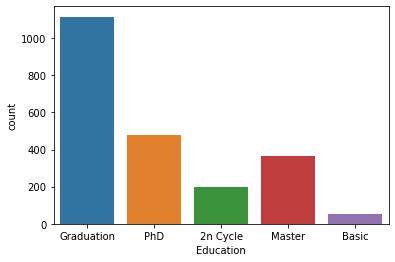

In [20]:
chart = sns.countplot(x=df_clean['Education'])  

plt.show()

Most of the customers have a bachelor degree.After that customers with PhD are the second largest group.People with basic education are the smallest group between customers.

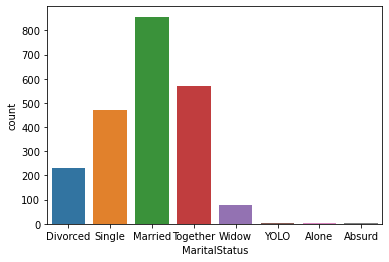

In [31]:
chart = sns.countplot(x=df_clean['MaritalStatus'])  

plt.show()

Most of the customers are married.

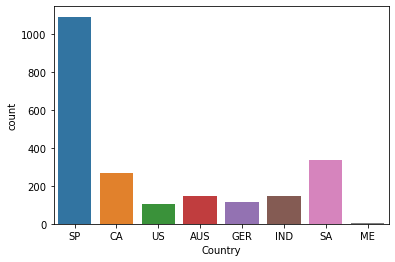

In [32]:
sns.countplot(x=df_clean['Country'])  

plt.show()

Most of the customers are from Spain. Mexico has the lowest number of customers.

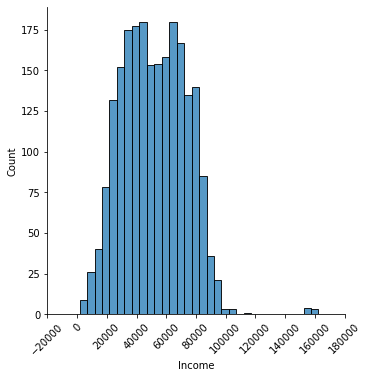

In [26]:
chart = sns.displot(x=df_clean['Income'])  

chart.set_xticklabels(rotation=45)

plt.show()

The income of most customers are between 0 and 100,000 dollars.

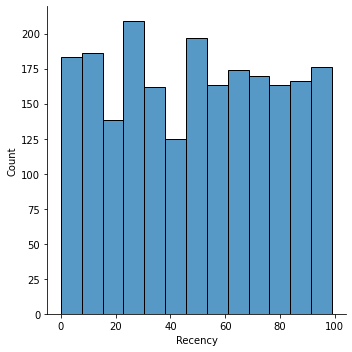

In [85]:
sns.displot(x=df_clean['Recency'])  

plt.show()

Number of days since the last purchase ranges between zero to 100  days.

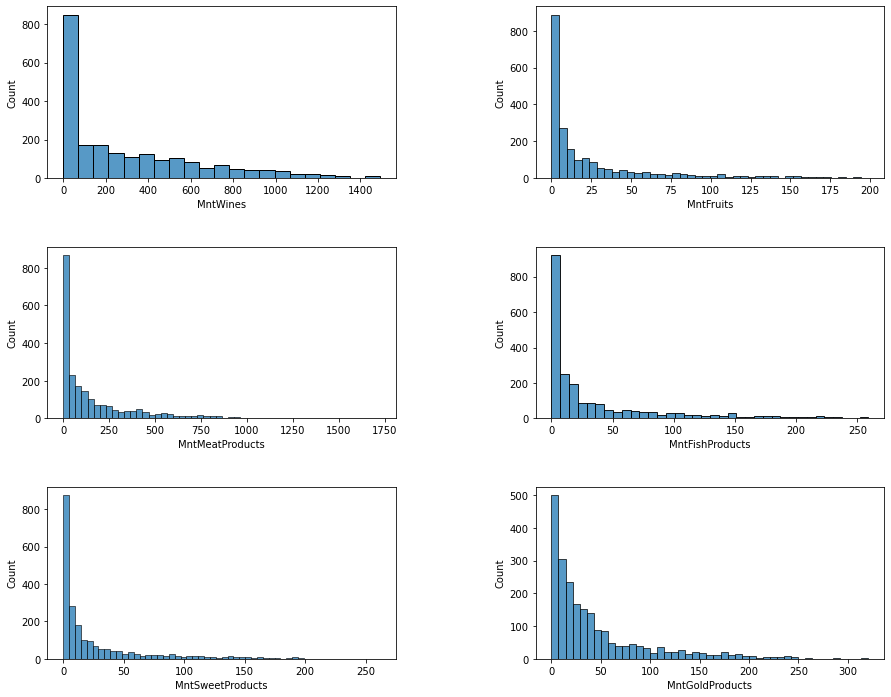

In [38]:
cols =  ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']
size = len(cols)

fig = plt.figure(figsize = (15, 12))

plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)

for i in range(0,size):
    plt.subplot(3, 2, i+1)
    sns.histplot(df_clean[cols[i]])  
plt.show()

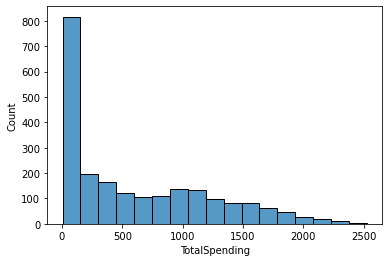

In [45]:
sns.histplot(df_clean['TotalSpending'])  

plt.show()

The distribution of amount spent on 6 items and distribution of total spending are all right-skewed.

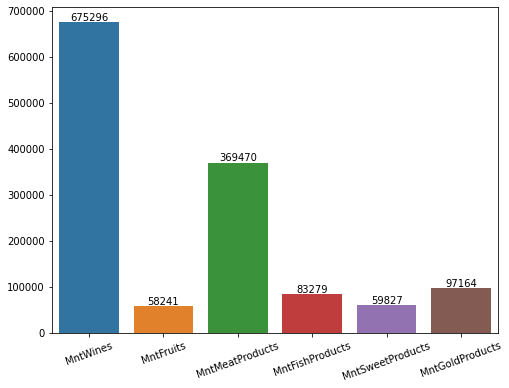

In [19]:
fig = plt.figure(figsize = (8, 6))

amount_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']

sr = df_clean[amount_cols].sum()

chart = sns.barplot(x= list(sr.index), y= list(sr.values))

chart.set_xticklabels(labels = list(sr.index), rotation=20)
chart.bar_label(chart.containers[0])

plt.show()

We can see from bar plot that `Wine` is the most popular product and after that `Meat Products` is at the second place.The least popular products are Fruits and Sweets.

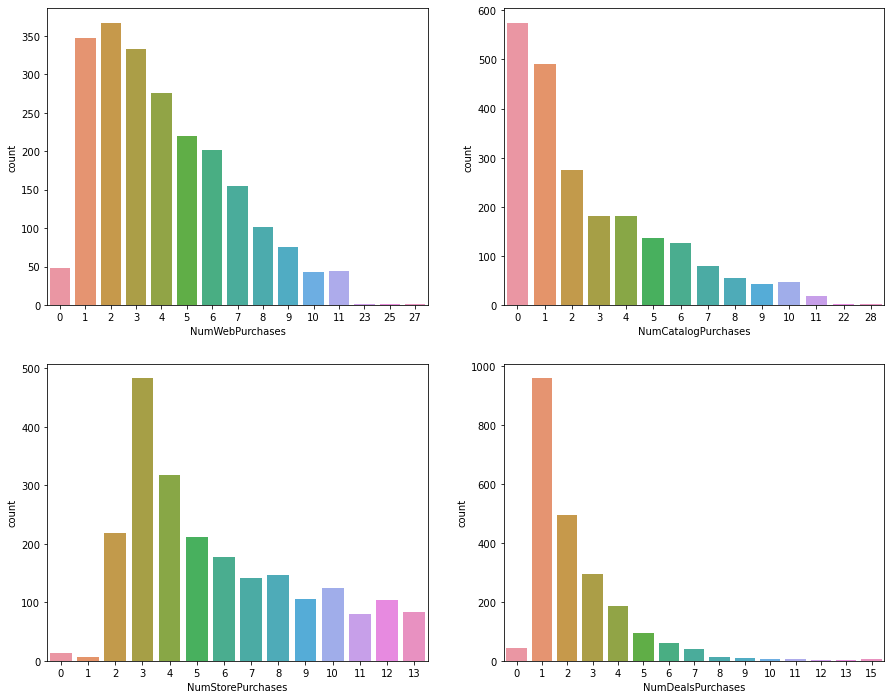

In [15]:
cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

size = len(cols)

fig = plt.figure(figsize = (15, 12))

for i in range(0,size):
    plt.subplot(2, 2, i+1)
    sns.countplot(df_clean[cols[i]])  
plt.show()

- The most frequent number of purchases made by the customers when using the website is 2.
- The most frequent number of purchases made by the customers when using the catalog is zero.
- The most frequent number of store purchases is 3.
- The most frequent number of deals purchases for each customer is one.

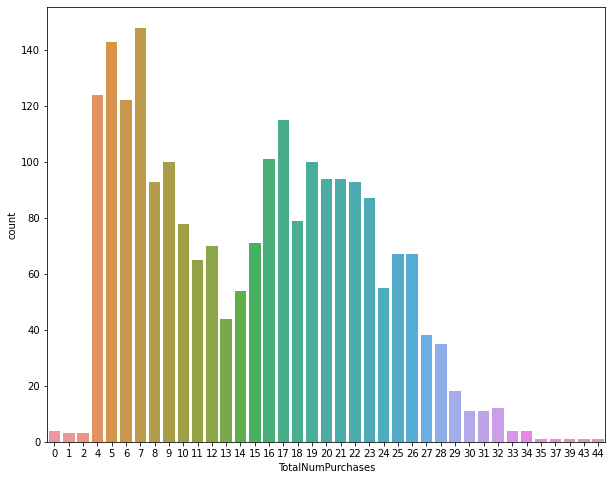

In [112]:
fig = plt.figure(figsize = (10, 8))

sns.countplot(df_clean['TotalNumPurchases'])  

plt.show()

- The most frequent number of total purchases made by each customer is 7.

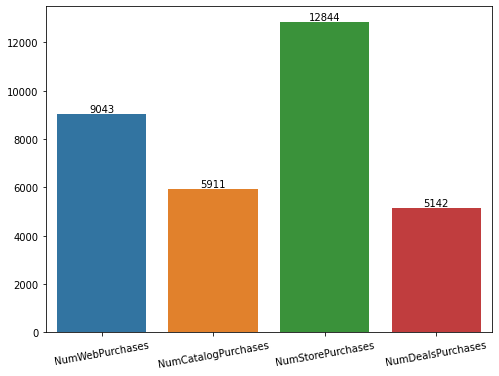

In [23]:
fig = plt.figure(figsize = (8, 6))

Num_Purchases_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

sr = df_clean[Num_Purchases_cols].sum()

chart = sns.barplot(x= list(sr.index), y= list(sr.values))

chart.set_xticklabels(labels = list(sr.index), rotation=10)
chart.bar_label(chart.containers[0])

plt.show()

We can see from bar plot that purchasing directly from stores is the most popular method of buying followed by web purchases through the company's web site.In the third place is using a catalogue.The least popular method is making purchases with a discount.

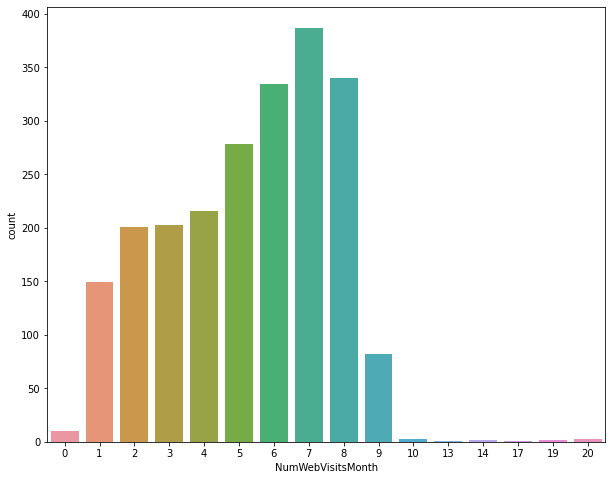

In [175]:
fig = plt.figure(figsize = (10, 8))

sns.countplot(df_clean['NumWebVisitsMonth'])  

plt.show()

- The most frequent number of website visits per month for each customer is 7.

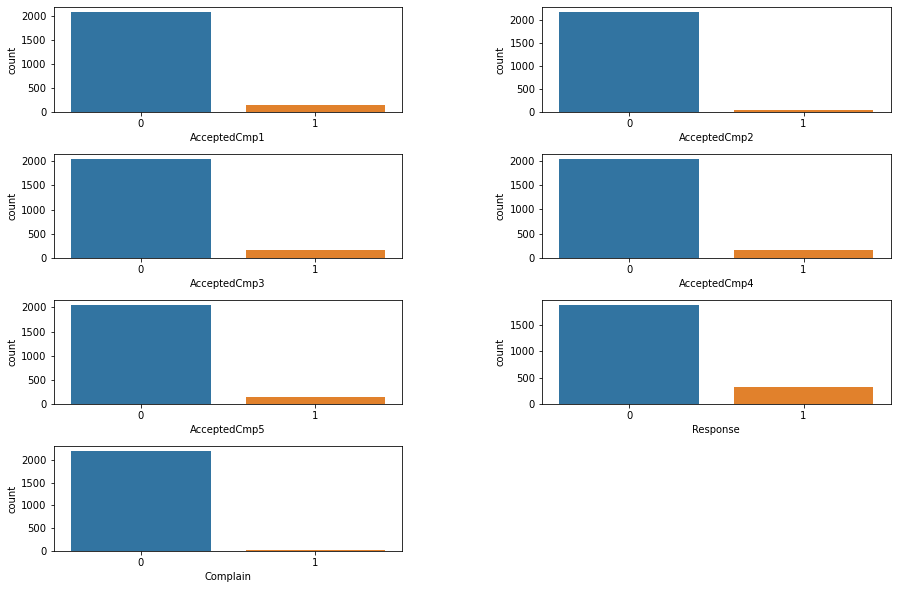

In [35]:
cols = ['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']
size = len(cols)

fig = plt.figure(figsize = (15, 10))
plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)

for i in range(0,size):
    plt.subplot(4, 2, i+1)
    sns.countplot(df_clean[cols[i]])  
plt.show()

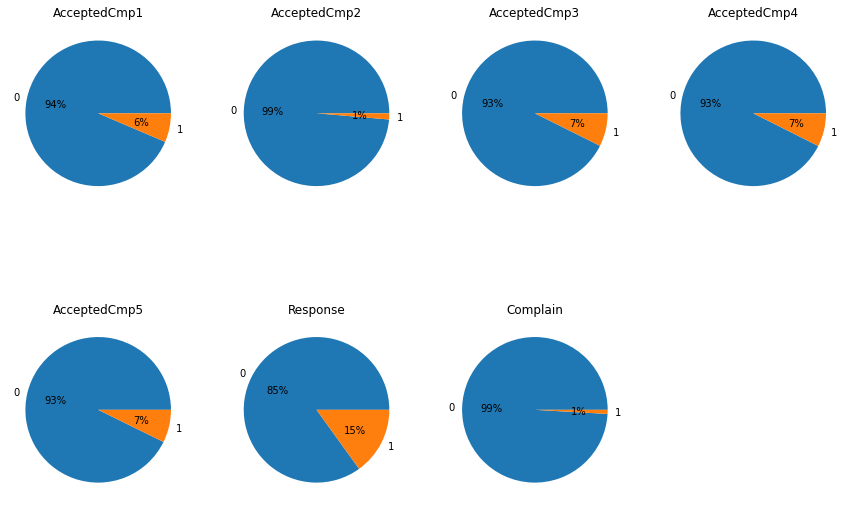

In [55]:
cols = ['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']
size = len(cols)

fig = plt.figure(figsize = (15, 10))

for i in range(0,size):
    plt.subplot(2, 4, i+1)
    plt.title(cols[i])
    data = df_clean[cols[i]].value_counts()
    plt.pie(data, labels=data.index, autopct='%.0f%%') 
plt.show()

- The most successful marketing campaign is the last campaign with 15% acceptance.
- Only one percent of customers complained in the last 2 years.

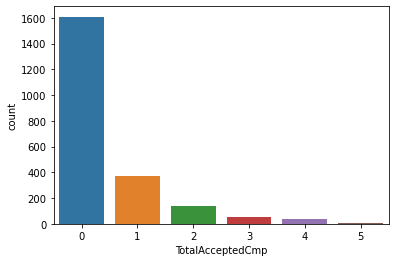

In [43]:
sns.countplot(df_clean['TotalAcceptedCmp'])  

plt.show()

We can see that near 1600 customers did not accept any campaign.Between customers who accepted campaigns, the majority of them accept only one campaign.This means that our campaigns were not successful.

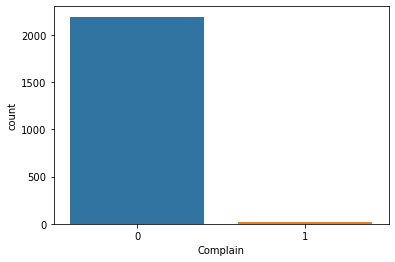

In [33]:
sns.countplot(df_clean['Complain'])  

plt.show()

We can see that only 21 customers complained in the last two years, whereas the overwhelming majority of customers did not have a complain.

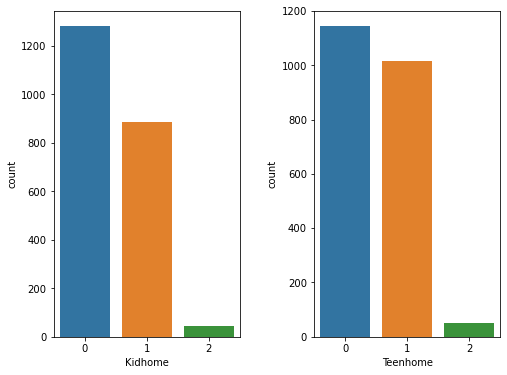

In [45]:
cols = ['Kidhome', 'Teenhome']
size = len(cols)

fig = plt.figure(figsize = (8, 6))

plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)

for i in range(0,size):
    plt.subplot(1, 2, i+1)
    sns.countplot(df_clean[cols[i]])  
plt.show()


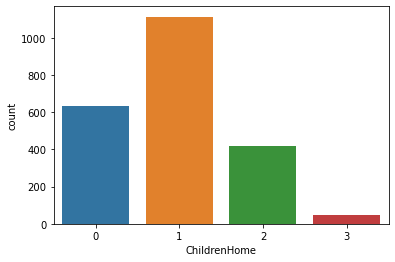

In [32]:
sns.countplot(df_clean['ChildrenHome'])  

plt.show()

The majority of customers have at least one children at home.

In [81]:
df_clean.describe()

,YearBirth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,ChildrenHome,NumYearCustomer,TotalSpending,TotalNumPurchases,TotalAcceptedCmp
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,1968.913653,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,...,0.064195,0.013562,0.150542,0.009042,54.086347,0.947559,9.971971,607.268083,14.891501,0.448915
std,11.701599,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,...,0.245156,0.115691,0.357683,0.094678,11.701599,0.749466,0.685926,602.513364,7.671629,0.893017
min,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,9.000000,5.000000,0.000000,0.000000
25%,1959.000000,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,46.000000,0.000000,10.000000,69.000000,8.000000,0.000000
50%,1970.000000,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,53.000000,1.000000,10.000000,397.000000,15.000000,0.000000
75%,1977.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,64.000000,1.000000,10.000000,1048.000000,21.000000,1.000000
max,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,1.000000,83.000000,3.000000,11.000000,2525.000000,44.000000,5.000000


In [15]:
df_clean.mean()

YearBirth               1968.913653
Income                 51958.810579
Kidhome                    0.441682
Teenhome                   0.505877
Recency                   49.019439
MntWines                 305.287523
MntFruits                 26.329566
MntMeatProducts          167.029837
MntFishProducts           37.648734
MntSweetProducts          27.046564
MntGoldProducts           43.925859
NumDealsPurchases          2.324593
NumWebPurchases            4.088156
NumCatalogPurchases        2.672242
NumStorePurchases          5.806510
NumWebVisitsMonth          5.321429
AcceptedCmp3               0.073689
AcceptedCmp4               0.074141
AcceptedCmp5               0.072785
AcceptedCmp1               0.064195
AcceptedCmp2               0.013562
Response                   0.150542
Complain                   0.009042
Age                       54.086347
ChildrenHome               0.947559
NumYearCustomer            9.971971
TotalSpending            607.268083
TotalNumPurchases         14

By looking at mean row, we can say that the average customer...

- is born in 1969 (54 years old)
- has an annual income of 51959 dollars
- has one child (0.5 teen and 0.44 kid)
- made a purchase from the company 49 days ago
- spent most on wines(305 dollars) and after that on meat products(167 dollars)
- spent least on fruits (26 dollars)
- has mostly made purchases directly in store (5.8)
- has visited the company's web site 5 times in the last month
- has purchased 15 times (14.89)
- has been a customer for 10 years (9.97)
- has accepted approximately 0.45 campaigns

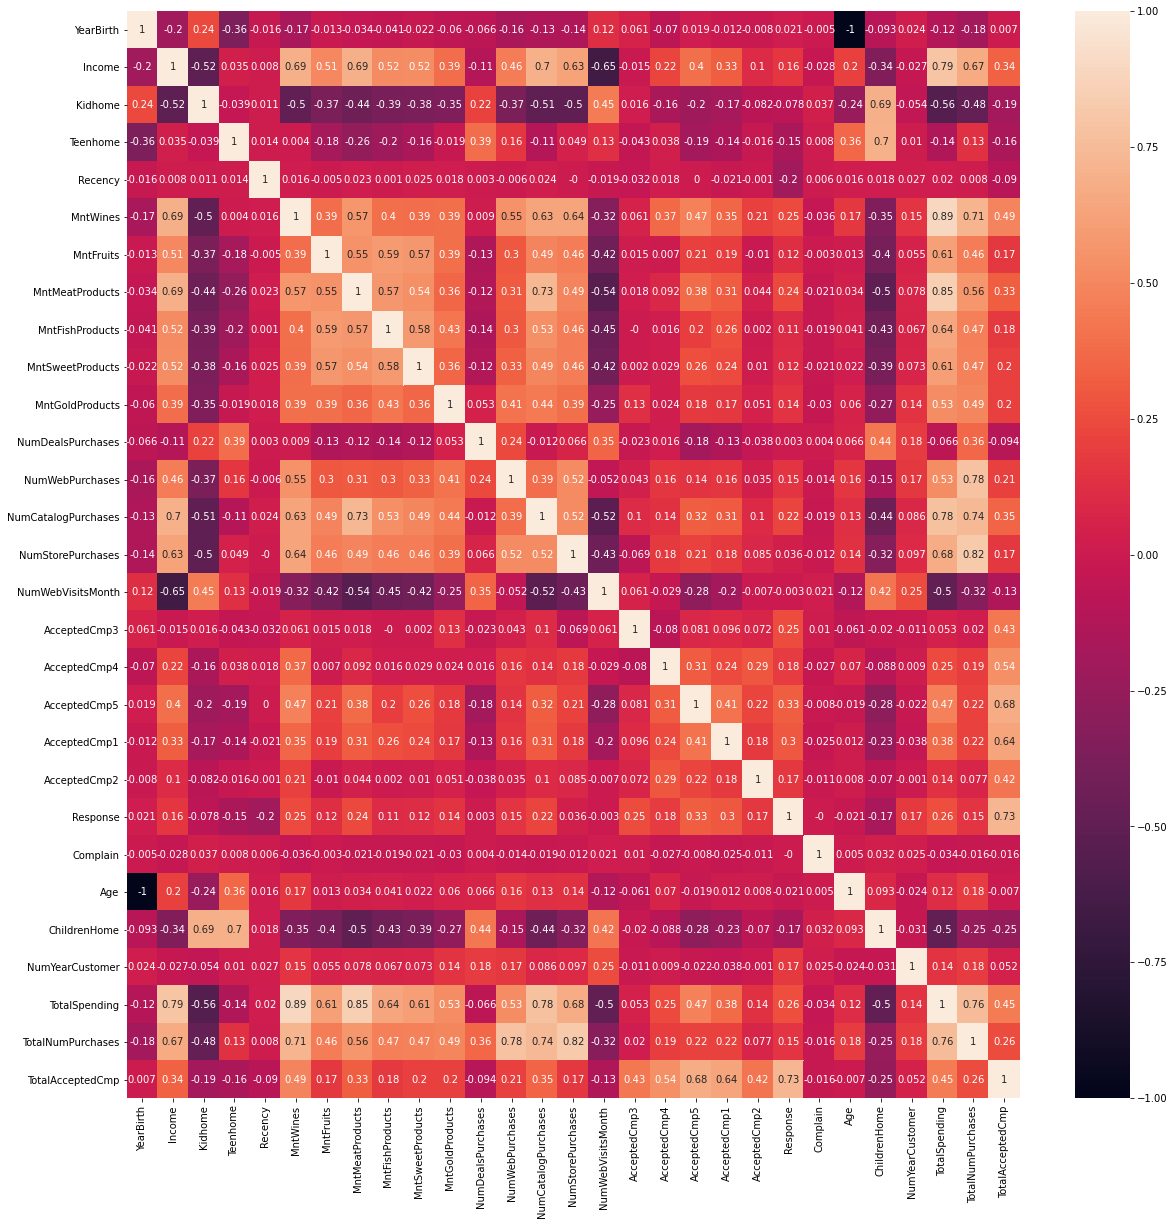

In [83]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(df_clean.corr().round(3), annot=True)
plt.show()

We can observe from the hitmap that:


- Income is highly correlated with `TotalSpending`, `TotalNumPurchases`, `NumCatalogPurchases`, `NumStorePurchases` , `MntWines` and `MntMeatProducts`.

- Income is also correlated with `MntWines`, `MntFruits`, `MntFishProducts`, `MntSweetProducts` and `MntGoldProducts` but with smaller correlation value.

- Income is negatively correlated with `NumDealsPurchases`, `NumWebVisitsMonth`, `Kidhome` and `ChildrenHome`.


* This means that those who have more income:
   * tend to spend and purchase more than other customers.
   * tend to purchase by using Catalog and purchasing in store.
   * tend to buy more wines and meat products
   * tend to make fewer purchases with a discount
   * tend to visit the company Website less than others
   * tend to have fewer Kids at home



- Kidhome is negatively correlated with `Income`, `MntWines`, `MntFruits`, `MntMeatProducts`,  `MntFishProducts`, `MntSweetProducts` , `MntGoldProducts`, `TotalSpending`, `TotalNumPurchases`, `NumWebPurchases`, `NumCatalogPurchases` and `NumStorePurchases`.

- Kidhome is positively correlated with `NumDealsPurchases` and `NumWebVisitsMonth`.



* This means that those who have more Kids at home:
  * tend to spend and purchase less than other customers
  * tend to have less income
  * tend to purchase less via the company Website
  * tend to purchase less uing Catalog
  * tend to purchase less directly in store
  * tend to make more purchases with a discount


- Teenhome has a weak negative correlation with `MntFruits`, `MntMeatProducts`,  `MntFishProducts`, `MntSweetProducts` , `TotalSpending` and `NumCatalogPurchases`.

- Teenhome has a weak positive correlation with `NumDealsPurchases` and `TotalNumPurchases`.


* This means that those who have more Teens at home:
  * tend to spend less than other customers
  * tend to purchase more
  * tend to have less income
  * tend to make more purchases with a discount


- Response has a weak positive correlation with Accepted Campaigns: `AcceptedCmp1`,`AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`.

- Response has a weak negative correlation with `Recency`, `Kidhome`, `Teenhome` and `ChildrenHome`.

- `AcceptedCmp5` has a positive correlation with `AcceptedCmp4`, `AcceptedCmp1`.


* Those who accepted the offer in the last campaign:
  * tend to accept offers from other campaigns
  * tend to have fewer Kids or teens at home
  * buy from the company more recently than other customers
  

* Those who accepted the offer in the 5th campaign:
  * tend to accept the offer from 1st and 4th campaigns more than other customers


- `NumWebVisitsMonth` has a strong negative correlation with income


- `NumWebVisitsMonth` has a negative correlation with amount spent on different items (`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProducts` and `TotalSpending`)


- `NumWebVisitsMonth` has a negative correlation with `NumCatalogPurchases`, `NumStorePurchases` and `TotalNumPurchases`.

- `NumWebVisitsMonth` has a weak negative correlation with `NumWebPurchases`

- `NumWebVisitsMonth` has a positive correlation with `NumDealsPurchases`.


- `NumWebVisitsMonth` has a weak negative correlation with Accepted offers from Campaigns (`AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5` and `Response`).



* Those who visit the company’s website more frequently in the last month:
  * tend to have a lower income
  * tend to spend less
  * tend to purchase less uing Catalog
  * tend to purchase less directly in store
  * tend to purchase less in total
  * tend to make more purchases with a discount
  * tend to accept the offers from advertising Campaigns more than other customers


- Interestingly `Age` does not have a correlation with amount spent on different products(`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProducts` and `TotalSpending`) or purchasing variables(`NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, `NumDealsPurchases`).

* Anomalies: 
    * I expected that those who have more Kids at home spend more than those who have not.Especially I expected that they buy more Sweet Products, cause children love sweets. On the contrary, Kidhome is negatively correlated with `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts` and `MntGoldProducts`.
    
    * I expected that when number of website visits in the last month increases, number of purchases made through the company's web site also increases. But `NumWebVisitsMonth` has a weak negative correlation with `NumWebPurchases`.

### Bivariate Analysis

In this stage, I will plot some charts to see if independent variables:

- income
- education
- age
- NumYearCustomer
- ChildrenHome
- Country

have association with dependent variables about amount spent on different items and number of purchases:

- mnt_wines
- mnt_fruits
- mnt_meat_products
- mnt_fish_products
- mnt_sweet_products
- mnt_gold_products
- num_deals_purchases
- num_web_purchases
- num_catalog_purchases
- num_store_purchases


Does a shopper's income, education level, and/or age relate to their purchasing behavior?

#### The Relationship Between Income and Amount Spent on Different Products

In this part, I will investigate the relationship between income and amount spent on six items(`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProducts`) and `TotalSpending`. 

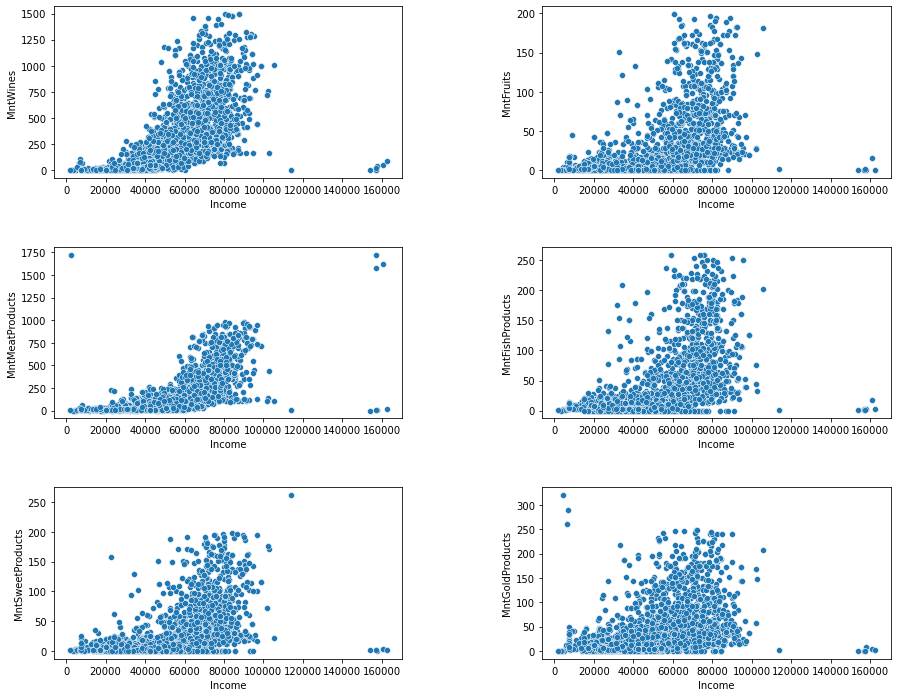

In [22]:
cols =  ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']
size = len(cols)

fig = plt.figure(figsize = (15, 12))

plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)

for i in range(0,size):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(data = df_clean
                ,x = 'Income'
                ,y = cols[i]
                #,alpha = .5
                )
plt.show()

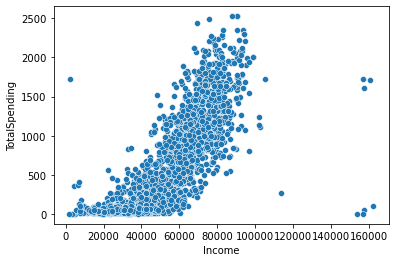

In [23]:
sns.scatterplot(data = df_clean
                ,x = 'Income'
                ,y = 'TotalSpending'
                )

plt.show()

We can see that there is a positive relationship between customer's income and amount spent on 6 different items in the last 2 years.Since `Income` variable has outliers and columns about Amount spent on different products are right-skewed, I will use logarithm transformation for both independent and dependent variables to make them normal distribution and finally plot the scatter plot of these two transformed variables. 

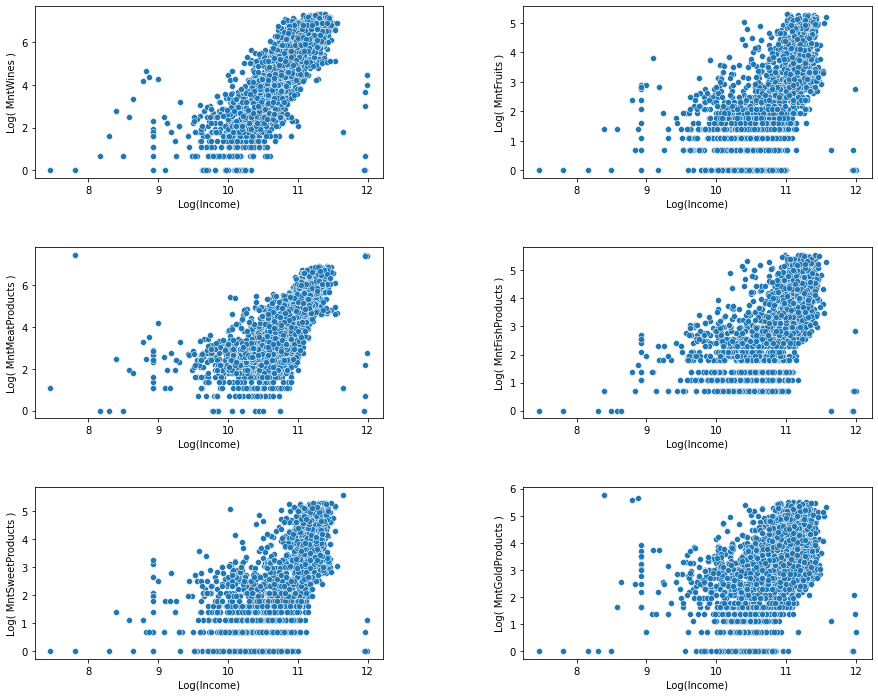

In [58]:
cols =  ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']
size = len(cols)

fig = plt.figure(figsize = (15, 12))

plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)

for i in range(0,size):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(y= df_clean[cols[i]].apply(lambda x: np.log(x)), x= df_clean["Income"].apply(lambda x: np.log(x)))
    plt.xlabel('Log(Income)')
    plt.ylabel(f'Log( {cols[i]} )')

plt.show()

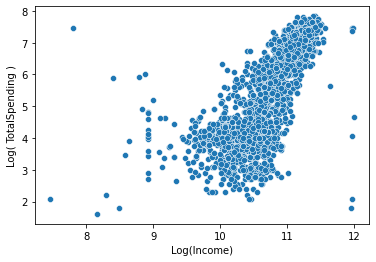

In [37]:
sns.scatterplot(y= df_clean['TotalSpending'].apply(lambda x: np.log(x)), x= df_clean["Income"].apply(lambda x: np.log(x)))
plt.xlabel('Log(Income)')
plt.ylabel(f'Log( TotalSpending )')

plt.show()

Now the strong positive relationship between income and amount spent on 6 products and also total spending is more obvious.

#### The Relationship Between Income and Number of Purchases

In this part, I will investigate the relationship between income and number of purchases with 4 different methods(`NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`) and `TotalNumPurchases`.

First lets plot the scatterplots of each number of purchases with income:

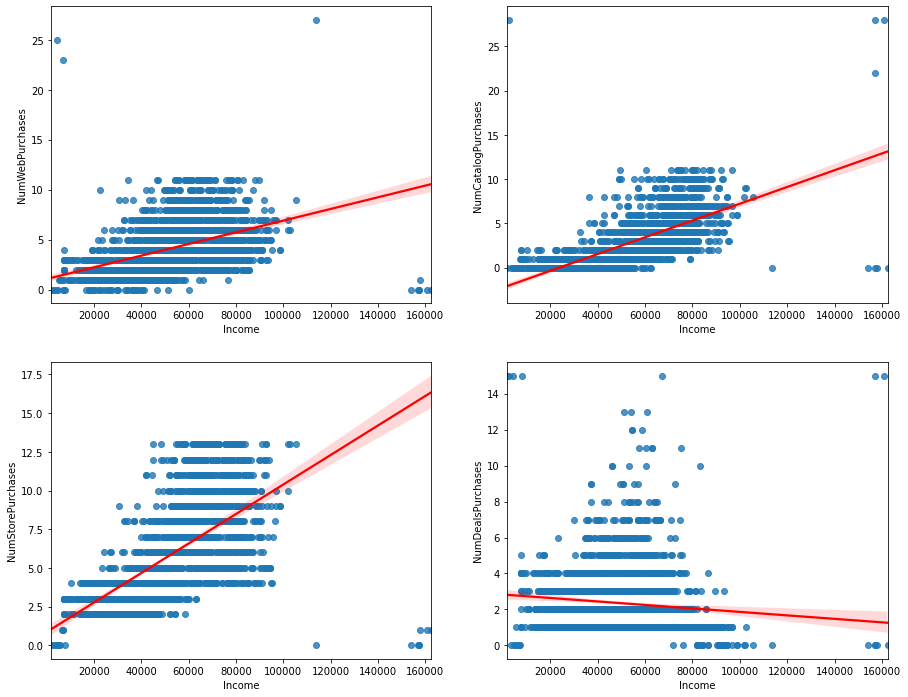

In [95]:
cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

size = len(cols)

fig = plt.figure(figsize = (15, 12))

for i in range(0,size):
    plt.subplot(2, 2, i+1)
    sns.regplot(x= df_clean["Income"], y= df_clean[cols[i]], line_kws={"color": "red"}) 
plt.show()


We can observe from the plots above that `Income` is highly correlated with `TotalNumPurchases`, `NumCatalogPurchases`, `NumStorePurchases`.Income has a weak negative correlation with `NumDealsPurchases` as you can see the regression line has small negative slope.We already know this from correlation heatmap.

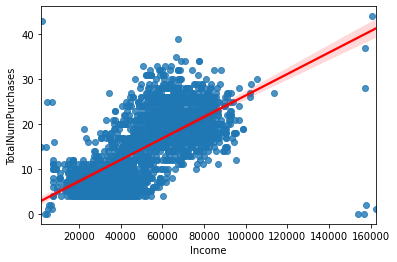

In [96]:
sns.regplot(x= df_clean["Income"], y= df_clean['TotalNumPurchases'], line_kws={"color": "red"}) 
plt.show()

`TotalNumPurchases` is also highly correlated with `Income` .

#### The Relationship of Amount Spent on Different Products with Level of Education

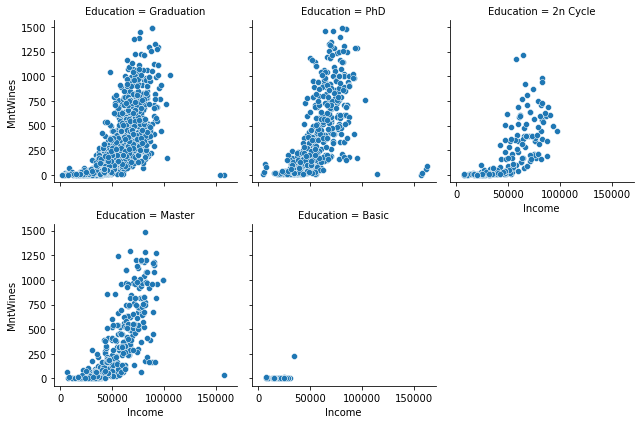

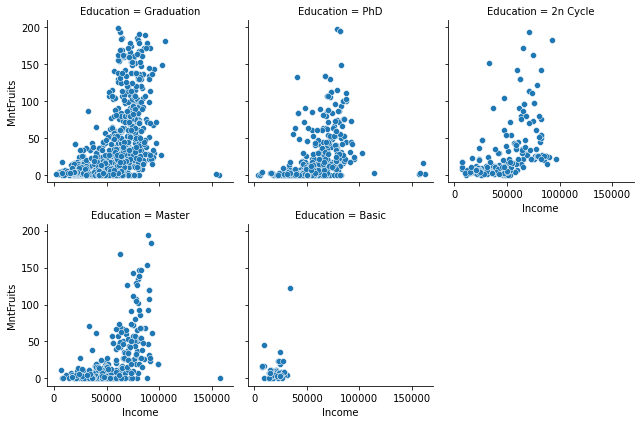

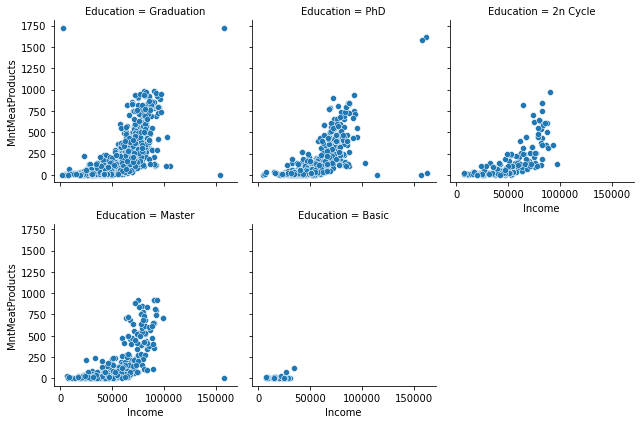

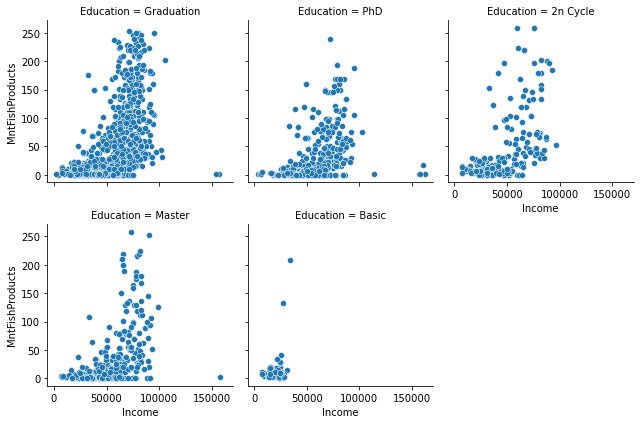

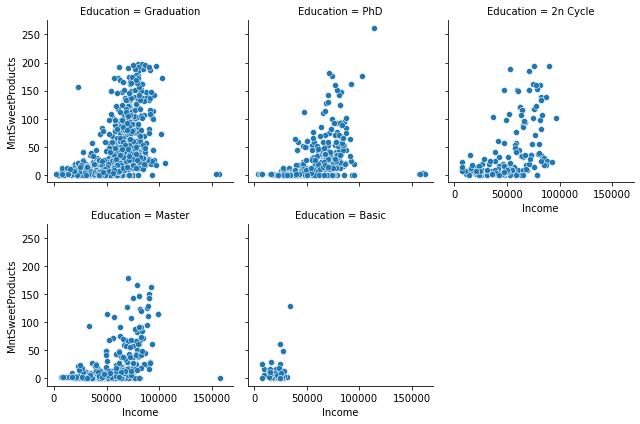

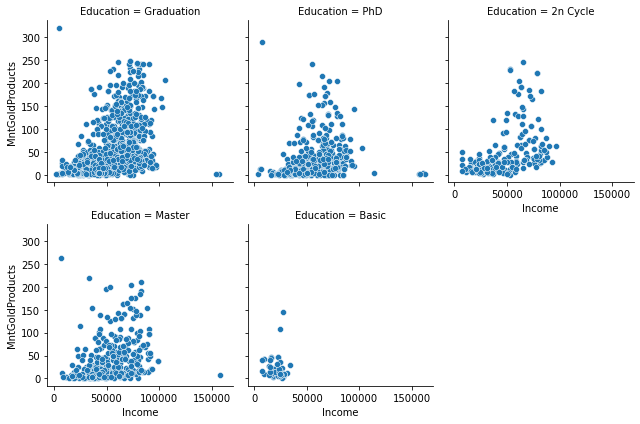

In [88]:
cols =  ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']

size = len(cols)

for i in range(0,size):
    g = sns.FacetGrid(df_clean, col ="Education", col_wrap=3)   
    g = g.map(sns.scatterplot, 'Income', cols[i])
    g.set_axis_labels('Income',f'{cols[i]}' )

plt.show()


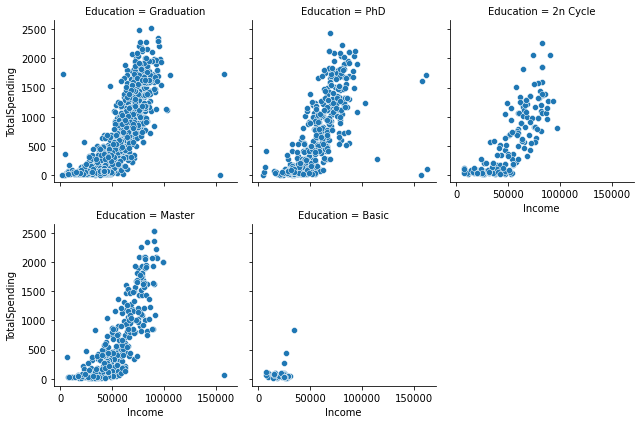

In [86]:
g = sns.FacetGrid(df_clean, col ="Education", col_wrap=3)   
g = g.map(sns.scatterplot, 'Income', 'TotalSpending')

plt.show()

We can observe from the facet grid plot that for all customers with different education levels, there is a strong positive linear relationship between amount spent on each item type and the income of the customer.

The number of customers with basic education is much lower than other groups(54 customers).We can ignore this group for further analysis.

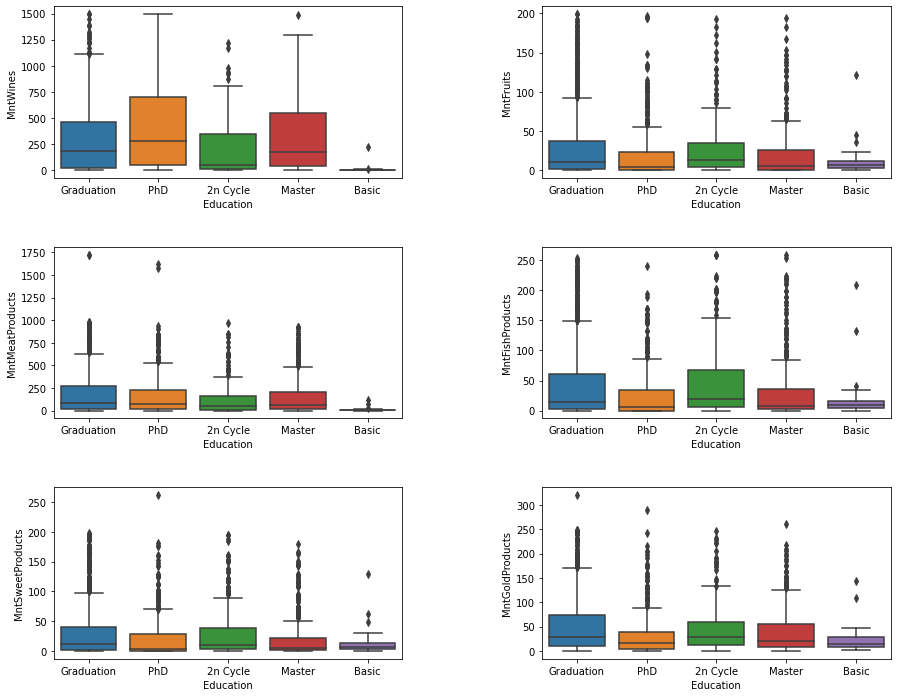

In [16]:
cols =  ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']

size = len(cols)

fig = plt.figure(figsize = (15, 12))

plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)

for i in range(0,size):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df_clean["Education"], y= df_clean[cols[i]])

plt.show()

By plotting boxplot of amount spent on 6 items for 5 different education groups, we can see that:
- Those who have PhD spent on wines more than other customers
- Those who have basic or second Cycle education spent less than other customers on wine 
- Those who have graduation degree or second Cycle spent more than other customers on fruits
- Those who have graduation degree spent more than other customers on meat products
- Those who have second Cycle education spent more than other customers on fish products
- Those who have graduation degree or second Cycle spent more than other customers on sweet products
- Those who have graduation degree or second Cycle spent more than other customers on gold products
- Those who have basic education spent less than other customers on all items
- All customers spent the least amount on fruits and sweet products

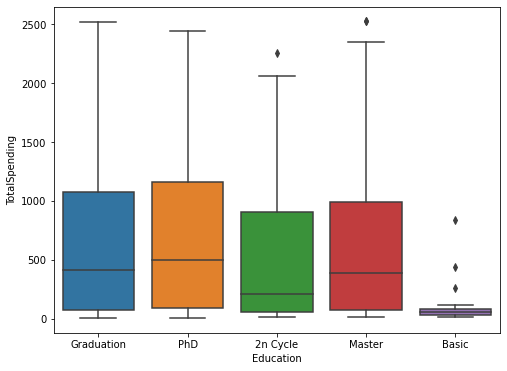

In [80]:
fig = plt.figure(figsize = (8, 6))

sns.boxplot(x=df_clean["Education"], y= df_clean['TotalSpending'])

plt.show()

From the boxplot of Total Spending of customers with different education, we can see that customers with PhD spent the highest amount between all the shoppers.

Now I would like to determine if having different education levels leads to the difference in the total spending of a customer.For this goal, I will use Kruskal-Wallis Test which is used to determine whether or not there is a statistically significant difference between the medians of three or more independent groups.

Kruskal-Wallis test is a non-parametric test and an alternative to One-Way Anova. By non-parametric we mean, the data is not assumed to become from a particular distribution.We can see form histograms of amount spent columns that they do not have normal distributions which is one of the assumptions of ANOVA.So we have to use Kruskal-Wallis test which is its non-parametric equivalent.

Hypothesis:

Our null and alternative hypotheses for total spending:

- The null hypothesis (H0): The median of total spending is the same for all the education groups.
- The alternative hypothesis: (Ha): The median of total spending is not equal for all the education groups.

In [52]:
from scipy import stats

Graduation_group = df_clean[df_clean['Education'] == 'Graduation']['TotalSpending']

PhD_group = df_clean[df_clean['Education'] == 'PhD']['TotalSpending']

Master_group = df_clean[df_clean['Education'] == 'Master']['TotalSpending']

Second_Cycle_group = df_clean[df_clean['Education'] == '2n Cycle']['TotalSpending']

Basic_group = df_clean[df_clean['Education'] == 'Basic']['TotalSpending']


#perform Kruskal-Wallis Test 
result1 = stats.kruskal(Graduation_group, PhD_group, Master_group, Second_Cycle_group, Basic_group)

result2 = stats.kruskal(Graduation_group, PhD_group, Master_group, Second_Cycle_group)

print(f"p-value of kruskal test is: {result1.pvalue} ")

print(f"p-value of kruskal test if we ignore customers with basic education: {result2.pvalue} ")

p-value of kruskal test is: 1.7239626508434392e-14 
p-value of kruskal test if we ignore customers with basic education: 0.00852331137852864 


Since the p-value for both cases are less than 0.05, we can reject the null hypothesis that the median of total spending is the same for all the education groups. We have sufficient evidence to conclude that the level of education leads to statistically significant differences in the total spending of the customer.

Now I would like to determine if having different education levels leads to the difference in the amount that customer spend on each of the 6 products(`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProducts`).

Our null and alternative hypotheses for each of the 6 items:

- The null hypothesis (H0): The median of Mnt(item) is the same for all the education groups.
- The alternative hypothesis: (Ha): The median of Mnt(item) is not equal for all the education groups.

item can be: `Wines` , `Fruits`, `MeatProducts`, `FishProducts`, `SweetProducts` or `GoldProducts`

In [83]:
from scipy import stats

cols =  ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']

size = len(cols)


for i in range(0,size):
    #perform Kruskal-Wallis Test
    Graduation_group = df_clean[df_clean['Education'] == 'Graduation'][cols[i]]
    
    PhD_group = df_clean[df_clean['Education'] == 'PhD'][cols[i]]
    
    Master_group = df_clean[df_clean['Education'] == 'Master'][cols[i]]
    
    Second_Cycle_group = df_clean[df_clean['Education'] == '2n Cycle'][cols[i]]
    
    Basic_group = df_clean[df_clean['Education'] == 'Basic'][cols[i]]
    
    result = stats.kruskal(Graduation_group, PhD_group, Master_group, Second_Cycle_group, Basic_group)
    
    print(f"p-value  of kruskal test for {cols[i]} is: {result.pvalue}")

p-value  of kruskal test for MntWines is: 9.564604308361013e-43
p-value  of kruskal test for MntFruits is: 2.0438679001874933e-14
p-value  of kruskal test for MntMeatProducts is: 3.986731744896404e-20
p-value  of kruskal test for MntFishProducts is: 2.1425246964606248e-15
p-value  of kruskal test for MntSweetProducts is: 1.0664996815881601e-15
p-value  of kruskal test for MntGoldProducts is: 7.225633722914844e-14


We can see that p-value of all six items are less than 0.05, we can reject the null hypothesis that the median of every Mnt(item) includes `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProducts` is the same for all the education groups. We have sufficient evidence to conclude that the level of education leads to statistically significant differences in the amount spent on Wines , Fruits, MeatProducts, FishProducts, SweetProducts and GoldProducts.

In [86]:
from scipy import stats

cols =  ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']

size = len(cols)


for i in range(0,size):
    #perform Kruskal-Wallis Test
    Graduation_group = df_clean[df_clean['Education'] == 'Graduation'][cols[i]]
    
    PhD_group = df_clean[df_clean['Education'] == 'PhD'][cols[i]]
    
    Master_group = df_clean[df_clean['Education'] == 'Master'][cols[i]]
    
    Second_Cycle_group = df_clean[df_clean['Education'] == '2n Cycle'][cols[i]]
    
    result = stats.kruskal(Graduation_group, PhD_group, Master_group, Second_Cycle_group)
    
    print(f"p-value  of kruskal test for {cols[i]}, if we ignore customers with basic education is: {result.pvalue}")

p-value  of kruskal test for MntWines, if we ignore customers with basic education is: 6.164386122819079e-16
p-value  of kruskal test for MntFruits, if we ignore customers with basic education is: 1.0765651170432387e-14
p-value  of kruskal test for MntMeatProducts, if we ignore customers with basic education is: 0.020905930591935542
p-value  of kruskal test for MntFishProducts, if we ignore customers with basic education is: 1.3126840455470621e-15
p-value  of kruskal test for MntSweetProducts, if we ignore customers with basic education is: 5.087388982463955e-16
p-value  of kruskal test for MntGoldProducts, if we ignore customers with basic education is: 2.8926856707997083e-13


We can see that by omitting customers with basic education from kruskal test (because of their low number), again we can reject the null hypothesis that the median of all Mnt(item)s except `MntMeatProducts` is the same for all the education groups. We have sufficient evidence to conclude that the level of education leads to statistically significant differences in the amount spent on Wines , Fruits, FishProducts, SweetProducts and GoldProducts.

Since the p-value of `MntMeatProducts` is 0.0209 which is greater than 0.05, we cannot reject the null hypothesis for Meat Products.

#### The Relationship of Amount Spent on Different Products with Age

In this part, I will investigate the relationship between age and amount spent on six items(`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProducts`) and `TotalSpending`. 

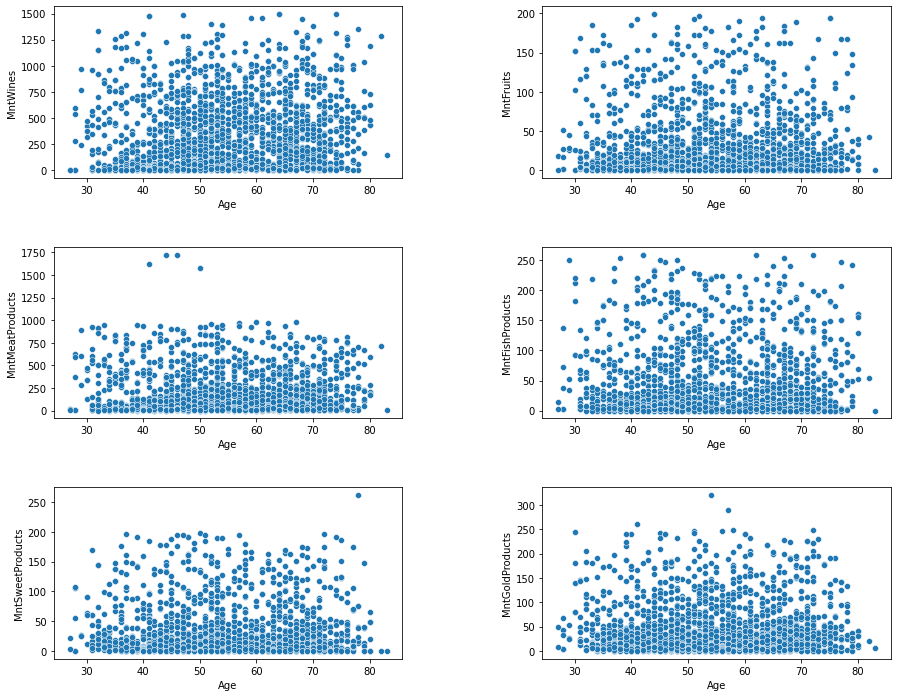

In [34]:
cols =  ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']
size = len(cols)

fig = plt.figure(figsize = (15, 12))

plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)

for i in range(0,size):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(data = df_clean
                ,x = 'Age'
                ,y = cols[i]
                #,alpha = .05
                )
plt.show()

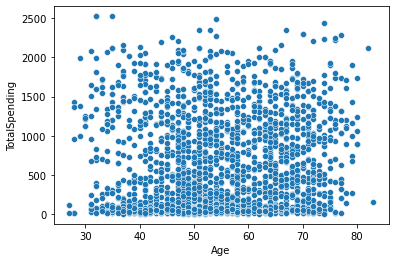

In [52]:
sns.scatterplot(data = df_clean
                ,x = 'Age'
                ,y = 'TotalSpending'
                )

plt.show()

It seems that there is no obvious relationship between `Age` and amount spent on different products.

#### The Relationship of Amount Spent on Different Products with Number of Years being Customer

Side-by-side box plots can be used to assess whether a quantitative variable(our numerical features) and a categorical variable(Type of Cancer) are associated.More overlap in the box plots indicates less association while less overlap in the box plots indicates a stronger association.

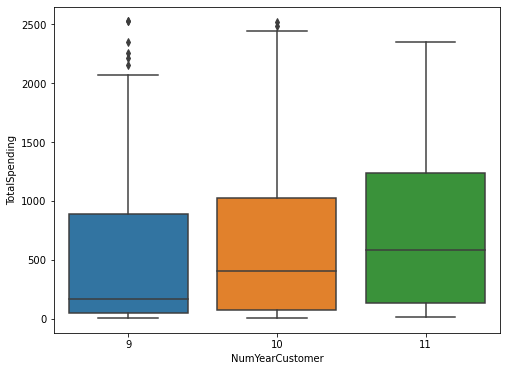

In [92]:
fig = plt.figure(figsize = (8, 6))

sns.boxplot(x=df_clean['NumYearCustomer'], y= df_clean['TotalSpending'])

plt.show()

In [76]:
df_clean.groupby('NumYearCustomer')['TotalSpending'].mean()

NumYearCustomer
9     494.686594
10    602.031624
11    746.597959
Name: TotalSpending, dtype: float64

Since the `NumYearCustomer` has only three discrete values, I consider  it as categorical variable and plot its boxplot with `TotalSpending`.The parallel box plots shows that median of `TotalSpending` and value of `NumYearCustomer` are associated because median Total Spendings increase with number of years being a customer.The spread of interquartile range of each category also increases.

This tells us that loyal customers tend to spend more and buy more from our company.The plot below shows that this is true for all amount spent columns.

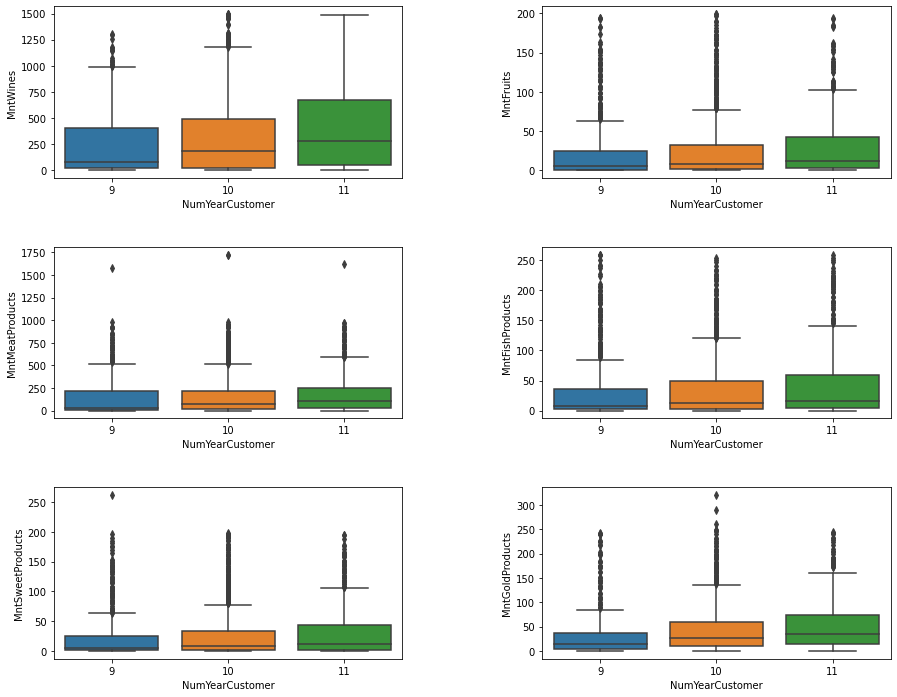

In [87]:
cols =  ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']

size = len(cols)

fig = plt.figure(figsize = (15, 12))

plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)

for i in range(0,size):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df_clean["NumYearCustomer"], y= df_clean[cols[i]])

plt.show()

#### The Relationship Between Amount Spent on Different Products and Number of Children at Home

The parallel box plots shows that median of TotalSpending and number of children at home are associated because median Total Spendings(and median of amounts spent on all six products) decrease with the number of children at home.The spread of interquartile range of each category also decreases.

This tells us that customers who have more children tend to spend less and buy less from our company.

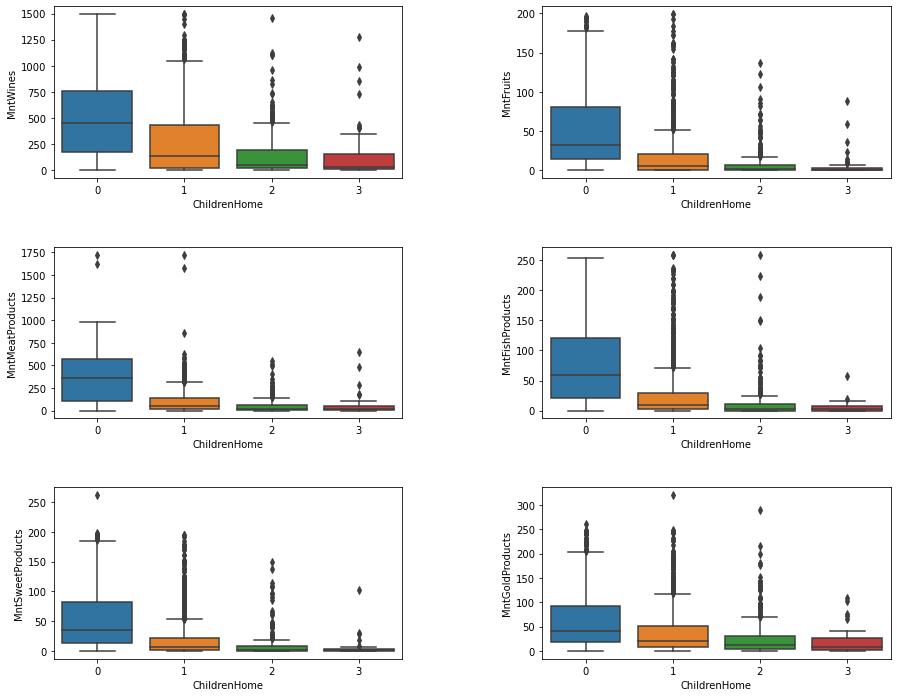

In [99]:
cols =  ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']

size = len(cols)

fig = plt.figure(figsize = (15, 12))

plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)

for i in range(0,size):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df_clean["ChildrenHome"], y= df_clean[cols[i]]) #ChildrenHome Kidhome

plt.show()

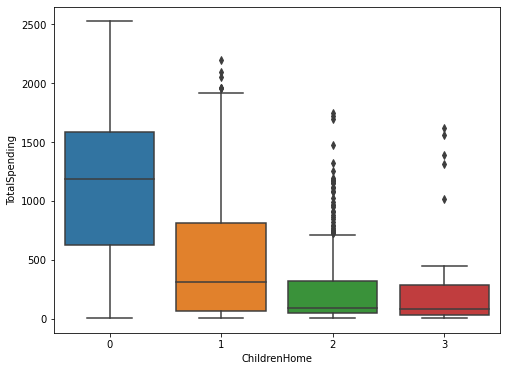

In [96]:
fig = plt.figure(figsize = (8, 6))

sns.boxplot(x=df_clean["ChildrenHome"], y= df_clean['TotalSpending']) #ChildrenHome Kidhome + Teenhome

plt.show()

#### The Relationship Between Number of Purchases and Number of Children at Home

<Figure size 576x432 with 0 Axes>

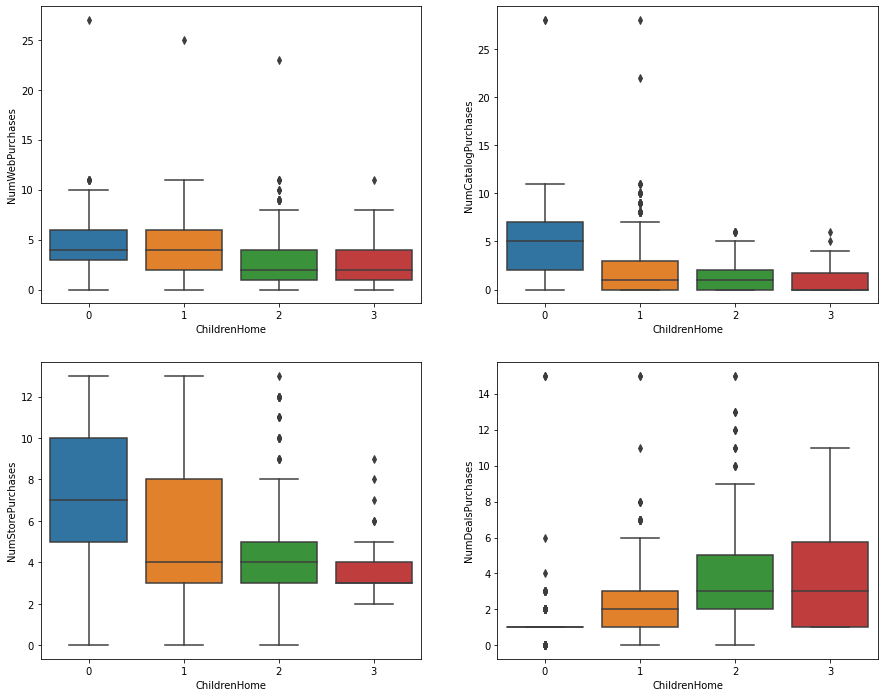

In [111]:
fig = plt.figure(figsize = (8, 6))

cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

size = len(cols)

fig = plt.figure(figsize = (15, 12))

for i in range(0,size):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df_clean["ChildrenHome"], y= df_clean[cols[i]]) #ChildrenHome = Kidhome + Teenhome 

plt.show()

We can observe from the plot that Number of purchases made with a discount increases with the number of children at home.The median of `NumDealsPurchases` and number of children at home are associated because median `NumDealsPurchases` increases with the number of children at home.The spread of interquartile range of each category also increases.

This tells us that customers who have more children tend to use deals for purchasing with a discount.


We can see from parallel box plots of other three methods (`NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`) that when number of children of customers increase, the number of purchases via the company Website, Catalog Purchases and Store Purchases also increase.

So we can say  that there is an association between `ChildrenHome` variable and `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, `NumDealsPurchases` and `TotalNumPurchases`.

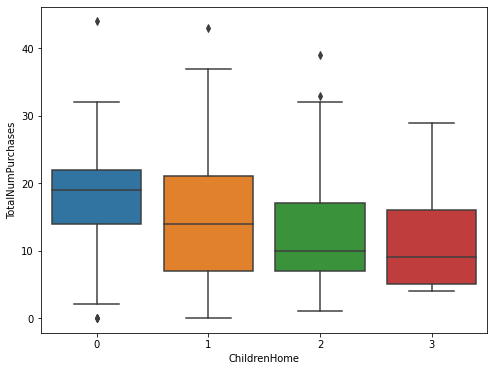

In [115]:
fig = plt.figure(figsize = (8, 6))

sns.boxplot(x=df_clean["ChildrenHome"], y= df_clean['TotalNumPurchases']) #ChildrenHome = Kidhome + Teenhome 

plt.show()

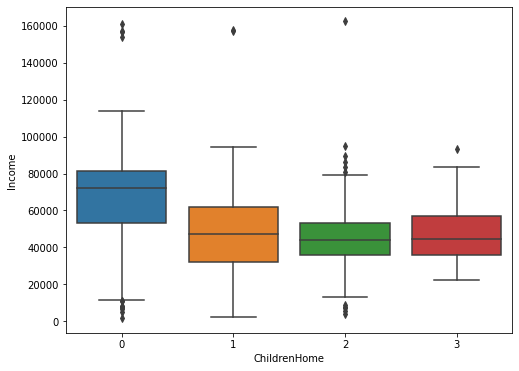

In [20]:
fig = plt.figure(figsize = (8, 6))

sns.boxplot(x=df_clean["ChildrenHome"], y= df_clean['Income']) #ChildrenHome = Kidhome + Teenhome 

plt.show()

By plotting the box plot of Income versus number of children, we can see that those who have higher income tend to have a fewer kids.

#### The Relationship Between Number of Visits to Company's Web Site in the Last Month and Income

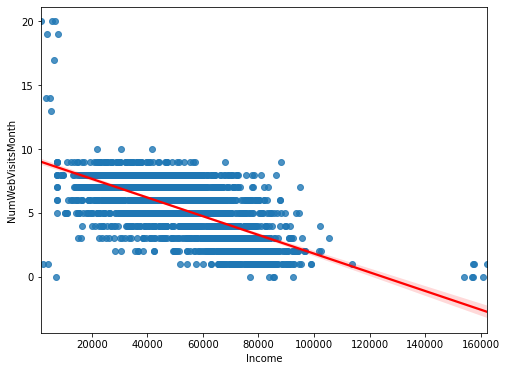

In [48]:
fig = plt.figure(figsize = (8, 6))

sns.regplot(data = df_clean
                ,x = 'Income'
                ,y = 'NumWebVisitsMonth'
                ,line_kws={"color": "red"}
                )
plt.show()

We can see that there is a strong negative correlation between income and number of visits to company's web site in the last month.Those who have a higher income do not visit the website frequently.

#### The Relationship Between Number of Visits to Company's Web Site in the Last Month and Amount Spent on Different Products

We can observe from the plots below that `NumWebVisitsMonth` has a negative correlation with amount spent on different items (`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProducts` and `TotalSpending`)

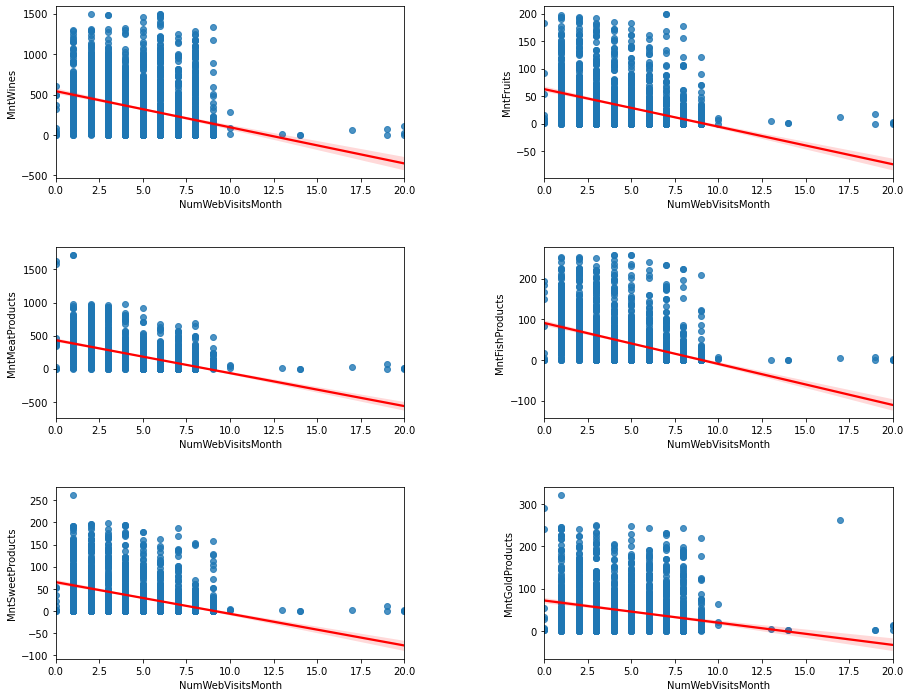

In [39]:
cols =  ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']
size = len(cols)

fig = plt.figure(figsize = (15, 12))

plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)

for i in range(0,size):
    plt.subplot(3, 2, i+1)
    sns.regplot(data = df_clean
                ,x = 'NumWebVisitsMonth'
                ,y = cols[i]
                ,line_kws={"color": "red"}
                )
plt.show()


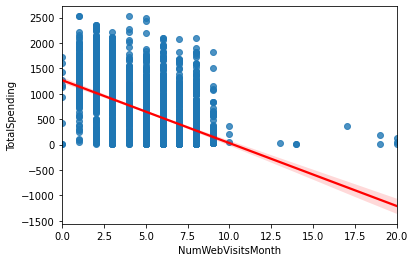

In [40]:
sns.regplot(data = df_clean
                ,x = 'NumWebVisitsMonth'
                ,y = 'TotalSpending'
                ,line_kws={"color": "red"}
                )
plt.show()


#### The Relationship Between Number of Visits to Company's Web Site in the Last Month and Number of Purchases

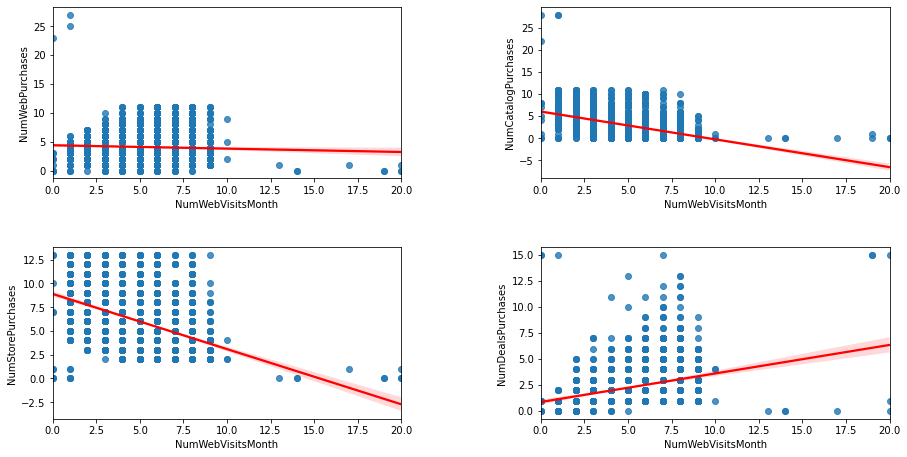

In [49]:
cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

size = len(cols)

fig = plt.figure(figsize = (15, 12))

plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)

for i in range(0,size):
    plt.subplot(3, 2, i+1)
    sns.regplot(data = df_clean
                ,x = 'NumWebVisitsMonth'
                ,y = cols[i]
                ,line_kws={"color": "red"}
                )
plt.show()

Suprisingly, when the number of website visits increases, the number of web purchases do not change substantialy and even the `NumWebPurchases` has a weak negative correlation with `NumWebVisitsMonth`.

We can observe from the plot that `NumCatalogPurchases` and `NumStorePurchases` have a negative correlation.As the number of visits to company's web site in the last month increases, `NumCatalogPurchases` and `NumStorePurchases` decreases.

The only number of purchases that shows a upward trend with `NumWebVisitsMonth`  is `NumDealsPurchases`.Customers who visit the company's web site more frequently, tend to make more purchases with a discount.

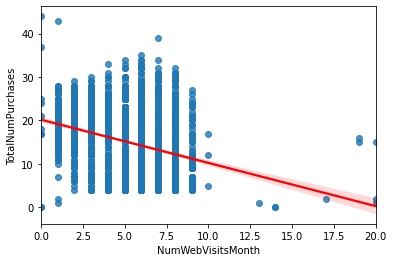

In [51]:
sns.regplot(data = df_clean
                ,x = 'NumWebVisitsMonth'
                ,y = 'TotalNumPurchases'
                ,line_kws={"color": "red"}
                )
plt.show()

The chart shows that `TotalNumPurchases` has a negative correlation with `NumWebVisitsMonth`.

#### The Relationship Between Amount Spent on Different Products and Country of Customer

In this part, I will investigate the relationship between customer's location and amount spent on six items(MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProducts) and TotalSpending.

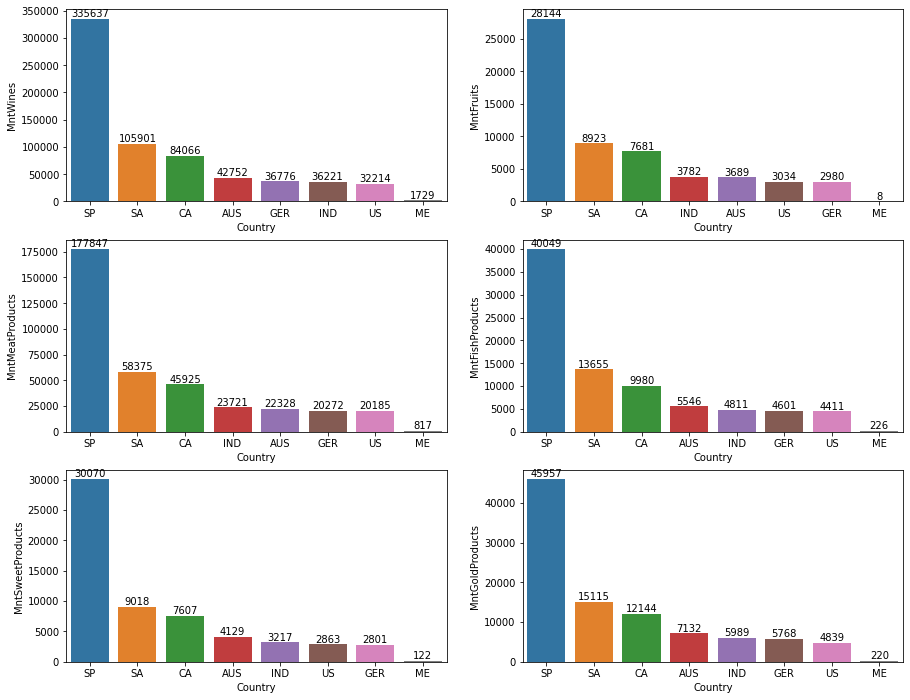

In [209]:
cols =  ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']

size = len(cols)

fig = plt.figure(figsize = (15, 12))

plt.subplots_adjust(wspace=0.2,
                    hspace=0.2)

for i in range(0,size):
    plt.subplot(3, 2, i+1)
    orderList = list(df_clean.groupby('Country')[cols[i]].sum().sort_values(ascending = False).index)
    chart = sns.barplot(x=df_clean["Country"], y= df_clean[cols[i]], estimator=sum, order=orderList, ci=None) #boxplot barplot
    chart.bar_label(chart.containers[0])

plt.show()

We can observe from the above plots that for all six items(Wines, Fruits, Meat Products, Fish Products, Sweet Products and Gold Products), customers from Spain(SP) has spent the highest amount of money.After that South Africa(SA) and Canada(CA) are at the second and third place of spending on these six products.Mexico(ME) has spent the lowest amount on all of these six products.

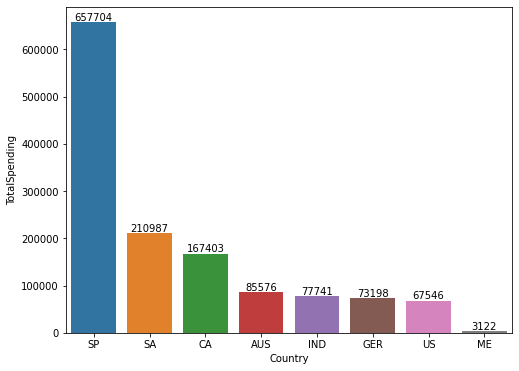

In [60]:
fig = plt.figure(figsize = (8, 6))

orderList = list(df_clean.groupby('Country')[cols[i]].sum().sort_values(ascending = False).index)
chart = sns.barplot(x=df_clean["Country"], y= df_clean['TotalSpending'], estimator=sum, order=orderList, ci=None) #boxplot barplot
chart.bar_label(chart.containers[0])

plt.show()

Customers from Spain(SP) has the highest spending amount and customers from Mexico has the lowest amount of spending. 

#### The Relationship Between Number of Purchases and Country of Customer

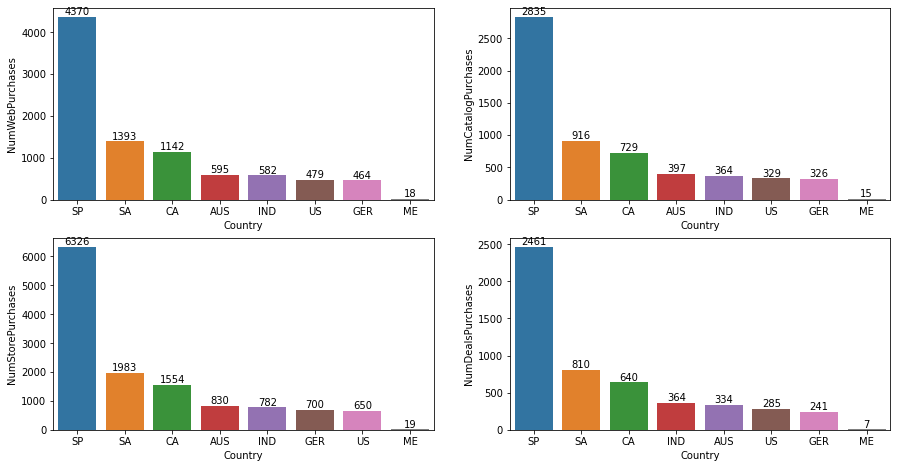

In [61]:
cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

size = len(cols)

fig = plt.figure(figsize = (15, 12))


for i in range(0,size):
    plt.subplot(3, 2, i+1)
    orderList = list(df_clean.groupby('Country')[cols[i]].sum().sort_values(ascending = False).index)
    chart = sns.barplot(x=df_clean["Country"], y= df_clean[cols[i]], estimator=sum, order=orderList, ci=None) #boxplot barplot
    chart.bar_label(chart.containers[0])

plt.show()

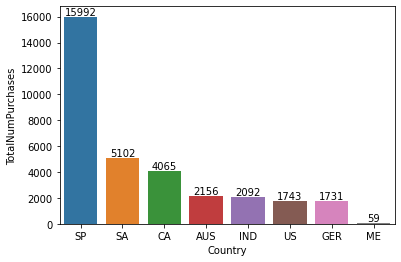

In [62]:
orderList = list(df_clean.groupby('Country')['TotalNumPurchases'].sum().sort_values(ascending = False).index)
chart = sns.barplot(x=df_clean["Country"], y= df_clean['TotalNumPurchases'], estimator=sum, order=orderList, ci=None) #boxplot barplot
chart.bar_label(chart.containers[0])

plt.show()

Spain(SP) has the highest total number of purchases.After that South Africa(SA) and Canada(CA) are at the second and third place of total number of purchases.Mexico(ME) has the lowest total number of purchases.

#### The Relationship Between Average Income and Country of Customers

We can observe from the plot below that although customers from Mexico(ME) spent the least between all countries, they have the highest income.Indian customers have the lowest income.

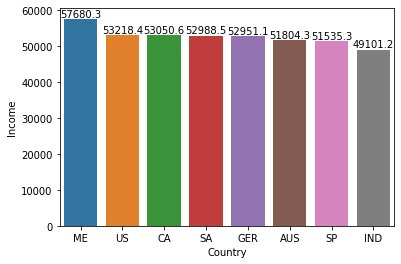

In [68]:
orderList = list(df_clean.groupby('Country')['Income'].mean().sort_values(ascending = False).index)
chart = sns.barplot(x=df_clean["Country"], y= df_clean['Income'], order=orderList, ci=None)
chart.bar_label(chart.containers[0])

plt.show()

#### The Relationship Between Average Number Children  and Country of Customers

We can observe from the plot below that on the average Indians has the highest number of children and Mexican customers has the lowest number of children.Every Indian customer has one child and every Mexican customer has 0.66 child. 

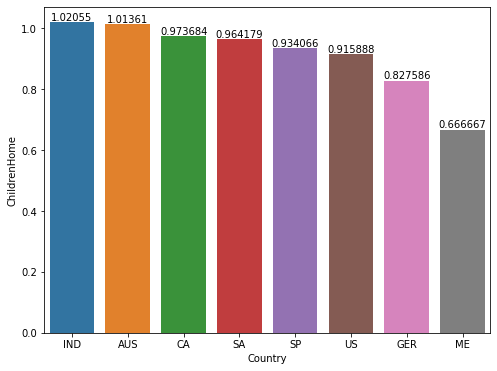

In [173]:
fig = plt.figure(figsize = (8, 6))

orderList = list(df_clean.groupby('Country')['ChildrenHome'].mean().sort_values(ascending = False).index)
chart = sns.barplot(x=df_clean["Country"], y= df_clean['ChildrenHome'], order=orderList, ci=None)
chart.bar_label(chart.containers[0])

plt.show()

#### The Relationship Between Number of Accepted Campaigns and Country of Customers

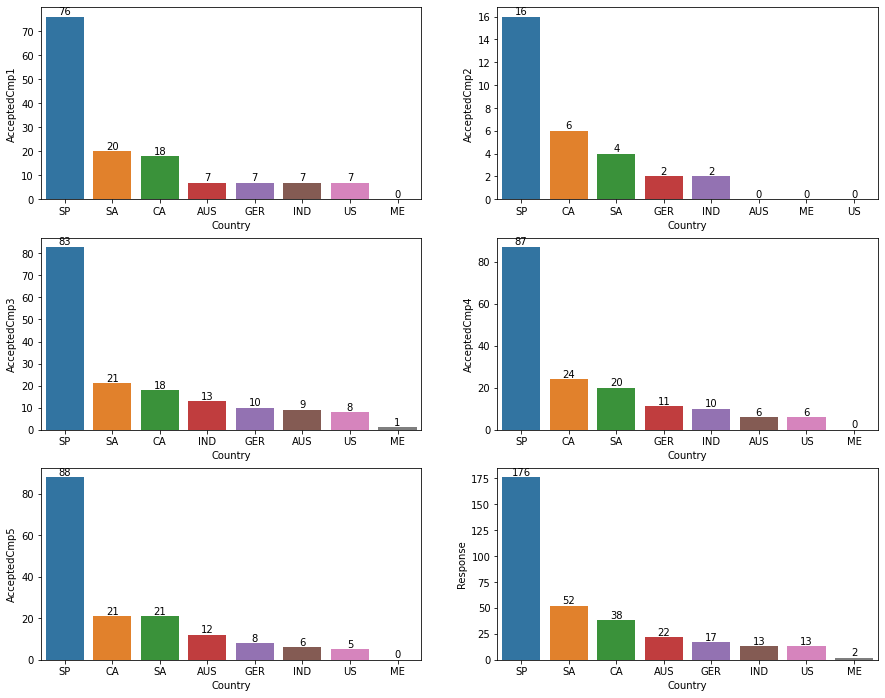

In [80]:
cols = ['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

size = len(cols)

fig = plt.figure(figsize = (15, 12))


for i in range(0,size):
    plt.subplot(3, 2, i+1)
    orderList = list(df_clean.groupby('Country')[cols[i]].sum().sort_values(ascending = False).index)
    chart = sns.barplot(x=df_clean["Country"], y= df_clean[cols[i]], estimator=sum, order=orderList, ci=None) #boxplot barplot
    chart.bar_label(chart.containers[0])

plt.show()

We can see that the last campaign is the most successful and popular campaign and the second campaign is the least popular one.In all of the six campaigns, most of the customers who accepted the offers are from Spain.After Spain, South Africa and Canada has the most number of accepted offers from their customers.Mexico has the least number of the customers who accepted the offers in all campaigns.Only three offers are accepted by Mexican customers. 

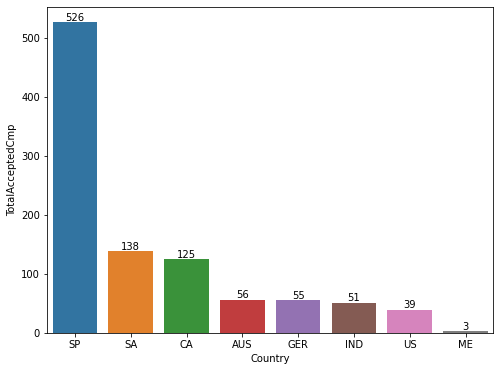

In [102]:
fig = plt.figure(figsize = (8, 6))

orderList = list(df_clean.groupby('Country')[cols[i]].sum().sort_values(ascending = False).index)
chart = sns.barplot(x=df_clean["Country"], y= df_clean['TotalAcceptedCmp'], estimator=sum, order=orderList, ci=None)
chart.bar_label(chart.containers[0])

plt.show()

We can also take a look at acceptance percentage of each campaign in different countries.

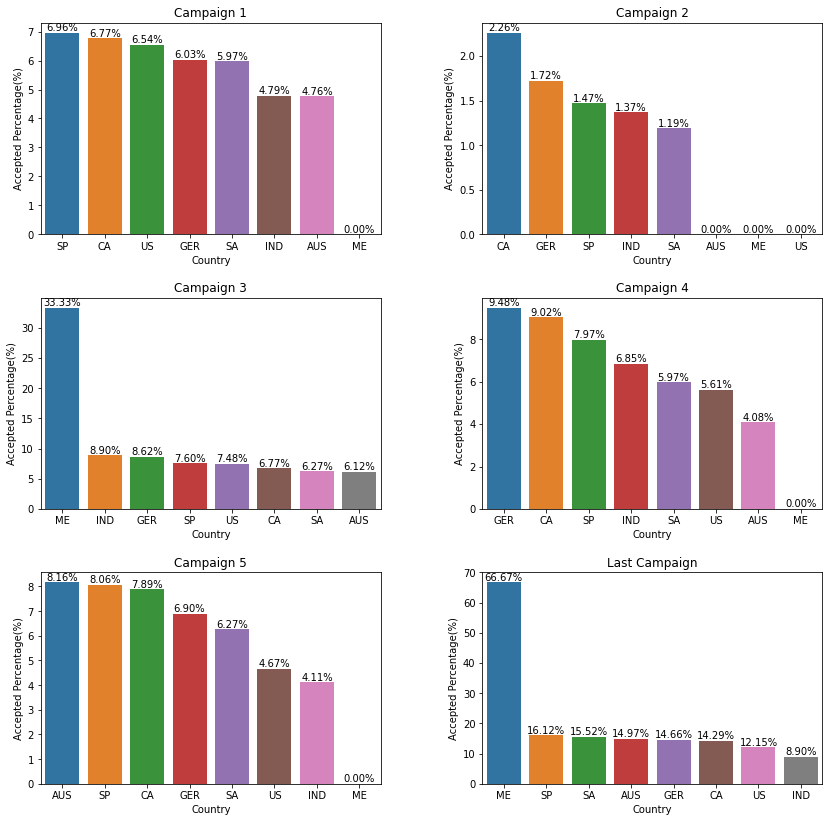

In [216]:
cols = ['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

Campaign_Lables= ['Campaign 1','Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Last Campaign']

size = len(cols)

fig = plt.figure(figsize = (14, 14))

plt.subplots_adjust(wspace=0.3,
                    hspace=0.3)

for i in range(0,size):
    plt.subplot(3, 2, i+1)
    groupby_series = df_clean.groupby('Country')[cols[i]]
    acceptance_perc = round(groupby_series.sum()/groupby_series.count(), 4)
    acceptance_perc = acceptance_perc.sort_values(ascending = False)
    ordered_list = list(acceptance_perc.index)

    chart = sns.barplot(x = ordered_list, y= list(100*acceptance_perc.values), order = ordered_list)
    chart.bar_label(chart.containers[0], fmt='%.2f%%')
    
    plt.xlabel("Country")
    plt.ylabel("Accepted Percentage(%)")
    plt.title(f"{Campaign_Lables[i]}")

plt.show()

- In Campaign 1 :Spain has the highest acceptance rate(6.96%) and Mexico has the lowest rate(0%).
- In Campaign 2 :Canada has the highest acceptance rate(2.26%) and Mexico, United States and Australia has the lowest rate(0%).
- In Campaign 3 :Mexico has the highest acceptance rate(33.33%) and Australia has the lowest rate(6.12%).
- In Campaign 4 :Germany has the highest acceptance rate(9.48%) and Mexico has the lowest rate(0%).
- In Campaign 5 :Australia has the highest acceptance rate(8.16%) and Mexico has the lowest rate(0%).
- In the last Campaign: Mexico has the highest acceptance rate(66.67%) and India has the lowest rate(8.90%).

#### The Relationship Between Total Number of Accepted Campaigns and Income

We can see from the box plot below that as income of a customer increases, the total number of campaign offers that he or she accepted also increases.

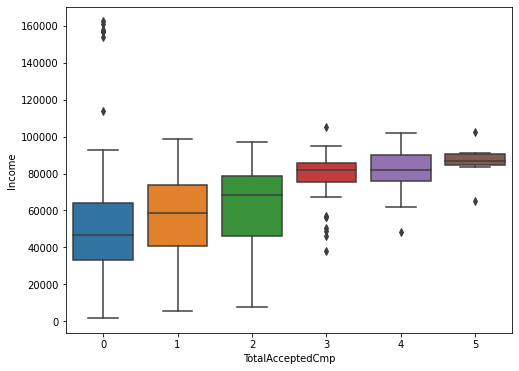

In [22]:
fig = plt.figure(figsize = (8, 6))

sns.boxplot(x=df_clean["TotalAcceptedCmp"], y= df_clean['Income'])

plt.show()


#### The Relationship Between Number of Complains and Country of Customer

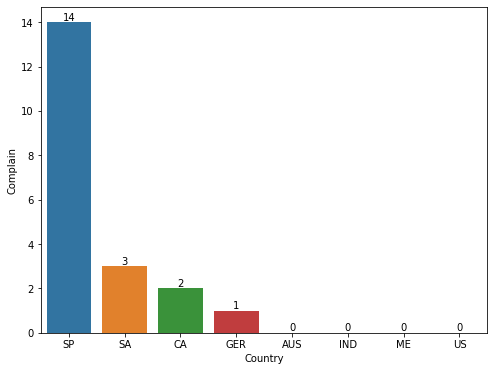

In [24]:

fig = plt.figure(figsize = (8, 6))

orderList = list(df_clean.groupby('Country')['Complain'].sum().sort_values(ascending = False).index)
chart = sns.barplot(x=df_clean["Country"], y= df_clean['Complain'], estimator=sum, order=orderList, ci=None)
chart.bar_label(chart.containers[0])

plt.show()

We can observe from the plot that Spanish customers has the most complains.After Spain, South Africa, Canada and Germany has the highest complains with respectively 3, 2 and 1 complains. Australia, India, Mexico and United States do not have any complains.

#### The Relationship Between Total Spending and Marital Status

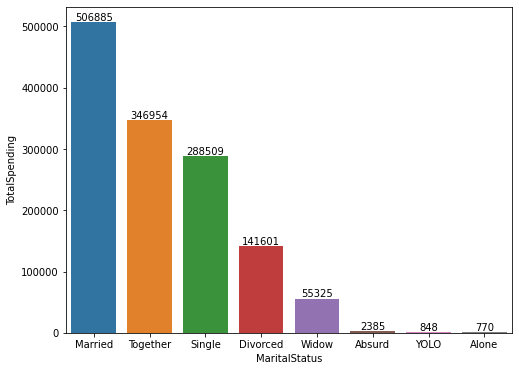

In [239]:
fig = plt.figure(figsize = (8, 6))

orderList = list(df_clean.groupby('MaritalStatus')['TotalSpending'].sum().sort_values(ascending = False).index)
chart = sns.barplot(x=df_clean["MaritalStatus"], y= df_clean['TotalSpending'], estimator=sum, order=orderList, ci=None)
chart.bar_label(chart.containers[0])

plt.show()

We can see that those customers who have a partner (married or together) spend much more than single or alone customers.

## Conclusions

These are my key findings:

- Most of the customers were born between 70's and 80's.
- Most of the customers are middle aged.Most of them are in the age group of 50-54.
- Most of the users have been a customer for 10 years.The other half of the users have been a customer for either 9 or 11 years.
- Most of the customers have partner (married or together).
- Most of the customers have a bachelor degree.
- After that customers with PhD are the second largest group.
- People with basic education are the smallest group between customers.
- Most of the customers are from Spain. Mexico has the lowest number of customers.
- The income of most customers are between 0 and 100,000 dollars.
- Number of days since the last purchase ranges between zero to 100 days.
- The distribution of amount spent on 6 items and distribution of total spending are all right-skewed.
- We can see from bar plot that `Wine` is the most popular product and after that `Meat Products` is at the second place.
- The least popular products are Fruits and Sweets.
- Purchasing directly from stores is the most popular method of buying followed by web purchases through the company's web site.In the third place is using a catalogue.The least popular method is making purchases with a discount.
- The most frequent number of website visits per month for each customer is 7.
- The most successful marketing campaign is the last campaign with 15% acceptance.
- Only one percent of customers complained in the last 2 years.
- Near 1600 customers did not accept any campaign.
- Between customers who accepted campaigns, the majority of them accept only one campaign.
- We can see that only 21 customers complained in the last two years, whereas the overwhelming majority of customers did not have a complain.
- The majority of customers have at least one children at home.


- Those who have more income:
   * tend to spend and purchase more than other customers.
   * tend to purchase by using Catalog and purchasing in store.
   * tend to buy more wines and meat products
   * tend to make fewer purchases with a discount
   * tend to visit the company Website less than others
   * tend to have fewer Kids at home


- Those who have more Kids at home:
  * tend to spend and purchase less than other customers
  * tend to have less income
  * tend to purchase less via the company Website
  * tend to purchase less uing Catalog
  * tend to purchase less directly in store
  * tend to make more purchases with a discount 


- Those who have more Teens at home:
  * tend to spend less than other customers
  * tend to purchase more
  * tend to have less income
  * tend to make more purchases with a discount


- Those who accepted the offer in the last campaign:
  * tend to accept offers from other campaigns
  * tend to have fewer Kids or teens at home
  * buy from the company more recently than other customers


- Those who accepted the offer in the 5th campaign:
  * tend to accept the offer from 1st and 4th campaigns more than other customers


- Those who visit the company’s website more frequently in the last month:
  * tend to have a lower income
  * tend to spend less
  * tend to purchase less uing Catalog
  * tend to purchase less directly in store
  * tend to purchase less in total
  * tend to make more purchases with a discount
  * tend to accept the offers from advertising Campaigns more than other customers


- There is a strong positive relationship between income and amount spent on 6 products and total spending.
- `Income` is highly correlated with `TotalNumPurchases`, `NumCatalogPurchases`, `NumStorePurchases`.
- Income has a weak negative correlation with `NumDealsPurchases`.
- `TotalNumPurchases` is also highly correlated with `Income` .
- For all customers with different education levels, there is a strong positive linear relationship between amount spent on each item type and the income of the customer.
- The number of customers with basic education is much lower than other groups(54 customers).
- Those who have PhD spent on wines more than other customers
- Those who have basic or second Cycle education spent less than other customers on wine 
- Those who have graduation degree or second Cycle spent more than other customers on fruits
- Those who have graduation degree spent more than other customers on meat products
- Those who have second Cycle education spent more than other customers on fish products
- Those who have graduation degree or second Cycle spent more than other customers on sweet products
- Those who have graduation degree or second Cycle spent more than other customers on gold products
- Those who have basic education spent less than other customers on all items
- All customers spent the least amount on fruits and sweet products
- The level of education leads to statistically significant differences in the total spending of the customer.
- The level of education leads to statistically significant differences in the amount spent on Wines , Fruits, MeatProducts, FishProducts, SweetProducts and GoldProducts.
- There is no obvious relationship between Age and amount spent on different products.
- Median of `TotalSpending` and value of `NumYearCustomer` are associated.
- Loyal customers tend to spend more and buy more from our company.
- There is an association between `ChildrenHome` variable and these variables: `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, `NumDealsPurchases` and `TotalNumPurchases`.
- There is a strong negative correlation between income and number of visits to company's web site in the last month.Those customers who have a higher income do not visit the website frequently.
- Suprisingly, when the number of website visits increases, the number of web purchases do not change substantialy and even the `NumWebPurchases` has a weak negative correlation with `NumWebVisitsMonth`.
- For all six items(Wines, Fruits, Meat Products, Fish Products, Sweet Products and Gold Products), customers from Spain(SP) has spent the highest amount of money.
- After that South Africa(SA) and Canada(CA) are at the second and third place of spending on these six products.
- Mexico(ME) has spent the lowest amount on all of these six products.
- Although customers from Mexico(ME) spent the least between all countries, they have the highest income.
- Indian customers have the lowest income.
- On the average Indians has the highest number of children and Mexican customers has the lowest number of children.Every Indian customer has one child and every Mexican customer has 0.66 child.


- The last campaign is the most successful and popular campaign and the second campaign is the least popular one.
- In all of the six campaigns, most of the customers who accepted the offers are from Spain.After Spain, South Africa and Canada has the most number of accepted offers from their customers.
- Mexico has the least number of the customers who accepted the offers in all campaigns.Only three offers are accepted by Mexican customers.
- In Campaign 1 :Spain has the highest acceptance rate(6.96%) and Mexico has the lowest rate(0%).
- In Campaign 2 :Canada has the highest acceptance rate(2.26%) and Mexico, United States and Australia has the lowest rate(0%).
- In Campaign 3 :Mexico has the highest acceptance rate(33.33%) and Australia has the lowest rate(6.12%).
- In Campaign 4 :Germany has the highest acceptance rate(9.48%) and Mexico has the lowest rate(0%).
- In Campaign 5 :Australia has the highest acceptance rate(8.16%) and Mexico has the lowest rate(0%).
- In the last Campaign: Mexico has the highest acceptance rate(66.67%) and India has the lowest rate(8.90%). 
- As income of a customer increases, the total number of campaign offers that he or she accepted also increases.
- Those customers who have a partner (married or together) spend much more than single or alone customers.
- Spanish customers has the most complains.
- After Spain, South Africa, Canada and Germany has the highest complains with respectively 3, 2 and 1 complains. 
- Australia, India, Mexico and United States do not have any complains.